In [2]:
#!pip install scikit-optimize shap

In [5]:
#!pip install plotly

In [1]:
# Filtering warnings 
import warnings
warnings.filterwarnings('ignore')

# Packages for data manipulation
import pandas as pd 
import numpy as np
import mpl_toolkits 
import datetime as dt
import time
import base64 
from pandas.api.types import CategoricalDtype

# Packages for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px
import plotly as ply
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Packages for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
import shap

%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
# Checking data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
df.shape

(10000, 14)

In [5]:
# Checking null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Checking duplicate values
sum(df.duplicated())

0

# Exploratory Data Analysis

In [7]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

- Tenure: the average length of stay of customers in the bank is approximately 5 years.
- Age: the average age is approximately 39 years old, varying between 18 and 92 years old - the median being 37 years old (which suggests the possible presence of outliers). 
- Exited: the average value of this variable is 0.203. Since it is composed only by binary values, 20.3% of customers are marked as churn. This also indicates that we are dealing with unbalanced data, containing approximately 2,030 records for the class of interest. This fact will be investigated later during the analysis 

0    7963
1    2037
Name: Exited, dtype: int64


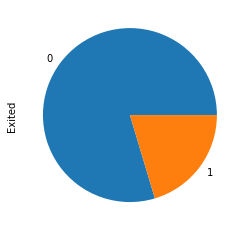

In [8]:
# Checking DataFrame balance
df['Exited'].value_counts().plot(kind = 'pie')
print(df['Exited'].value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64


The percentage of males is: 54.57%
The percentage of females is: 45.43%


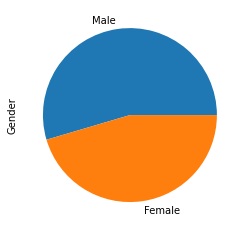

In [10]:
# Variable Gender
df['Gender'].value_counts().plot(kind = 'pie')
print(df['Gender'].value_counts())

perc_male = df.query('Gender == "Male"').Gender.count() / len(df)
perc_female = df.query('Gender == "Female"').Gender.count() / len(df)

print('\n')
print(f'The percentage of males is: {perc_male*100:.2f}%')
print(f'The percentage of females is: {perc_female*100:.2f}%')

In [13]:
df['HasCrCard']

0       1
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: HasCrCard, Length: 10000, dtype: int64

1    7055
0    2945
Name: HasCrCard, dtype: int64


The percentage of clients with credit card is: 70.55%
The percentage of clients without credit card is: 29.45%


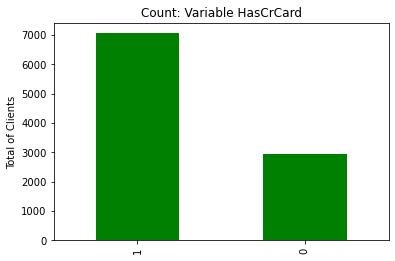

In [14]:
# Variable HasCrCard
df['HasCrCard'].value_counts().plot(kind = 'bar',color='green')
plt.title('Count: Variable HasCrCard')
plt.ylabel('Total of Clients');

print(df['HasCrCard'].value_counts())

perc_HasCrCard_1 = df.query('HasCrCard == 1').HasCrCard.count() / len(df)
perc_HasCrCard_0 = df.query('HasCrCard == 0').HasCrCard.count() / len(df)

print('\n')
print(f'The percentage of clients with credit card is: {perc_HasCrCard_1*100:.2f}%')
print(f'The percentage of clients without credit card is: {perc_HasCrCard_0*100:.2f}%')

1    5151
0    4849
Name: IsActiveMember, dtype: int64


The percentage of active members is: 51.51%
The percentage of non-active members is: 48.49%


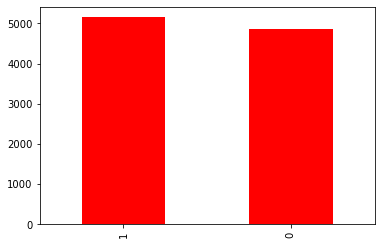

In [16]:
# Variable IsActiveMember
df['IsActiveMember'].value_counts().plot(kind = 'bar',color='red')
print(df['IsActiveMember'].value_counts())

perc_IsActiveMember_1 = df.query('IsActiveMember == 1').IsActiveMember.count() / len(df)
perc_IsActiveMember_0 = df.query('IsActiveMember == 0').IsActiveMember.count() / len(df)

print('\n')
print(f'The percentage of active members is: {perc_IsActiveMember_1*100:.2f}%')
print(f'The percentage of non-active members is: {perc_IsActiveMember_0*100:.2f}%')

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


The percentage of clients with 1 product is: 50.84%
The percentage of clients with 2 products is: 45.90%
The percentage of clients with 3 products is: 2.66%
The percentage of clients with 4 products is: 0.60%


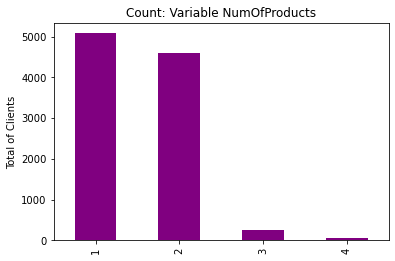

In [18]:
# Variable NumOfProducts
df['NumOfProducts'].value_counts().plot(kind = 'bar',color='purple')
plt.title('Count: Variable NumOfProducts')
plt.ylabel('Total of Clients');

print(df['NumOfProducts'].value_counts())

perc_NumofProducts_1 = df.query('NumOfProducts == 1').NumOfProducts.count() / len(df)
perc_NumofProducts_2 = df.query('NumOfProducts == 2').NumOfProducts.count() / len(df)
perc_NumofProducts_3 = df.query('NumOfProducts == 3').NumOfProducts.count() / len(df)
perc_NumofProducts_4 = df.query('NumOfProducts == 4').NumOfProducts.count() / len(df)

print('\n')
print(f'The percentage of clients with 1 product is: {perc_NumofProducts_1*100:.2f}%')
print(f'The percentage of clients with 2 products is: {perc_NumofProducts_2*100:.2f}%')
print(f'The percentage of clients with 3 products is: {perc_NumofProducts_3*100:.2f}%')
print(f'The percentage of clients with 4 products is: {perc_NumofProducts_4*100:.2f}%')

In [20]:
#!pip install folium

In [21]:
# Variable Geography
import folium
import requests

In [22]:
europe_geo = 'world-countries.json'

In [23]:
data_paises = df.groupby('Geography').agg({'CustomerId':'size'})
data_paises.reset_index(inplace=True)
data_paises['id'] = ['FRA','DEU','ESP']
print(data_paises)

map = folium.Map(location = [52.556425,2.504705],zoom_start = 3.8)
map.choropleth(geo_data=europe_geo, data=data_paises,
             columns=['id', 'CustomerId'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.5, line_opacity=0.2,
             legend_name = 'Total of clients')
map.save('plot_data.html')
map

  Geography  CustomerId   id
0    France        5014  FRA
1   Germany        2509  DEU
2     Spain        2477  ESP


In [24]:
perc_France = df.query('Geography == "France"').Geography.count() / len(df)
perc_Germany = df.query('Geography == "Germany"').Geography.count() / len(df)
perc_Spain = df.query('Geography == "Spain"').Geography.count() / len(df)

print(f'The percentage of clients in France is: {perc_France*100:.2f}%')
print(f'The percentage of clients in Germany is: {perc_Germany*100:.2f}%')
print(f'The percentage of clients in Spain is: {perc_Spain*100:.2f}%')

The percentage of clients in France is: 50.14%
The percentage of clients in Germany is: 25.09%
The percentage of clients in Spain is: 24.77%


In [25]:
# Histograms Function
def desenhar_hist(x):
  bins = 10
  plt.figure(figsize=(10,10))
  for each, var in enumerate(x):
      rows = int(len(x)/2)
    
      plt.subplot(rows, 2, each+1)
    
      sns.distplot(df[df['Exited']==0][var], bins=bins, color='blue', label='Not Exited');
      sns.distplot(df[df['Exited']==1][var], bins=bins, color='red', label='Exited');
    
      plt.legend(loc='upper right')
      plt.title('Histograma Segmentado - {} '.format(var))

  plt.tight_layout()
  plt.show()

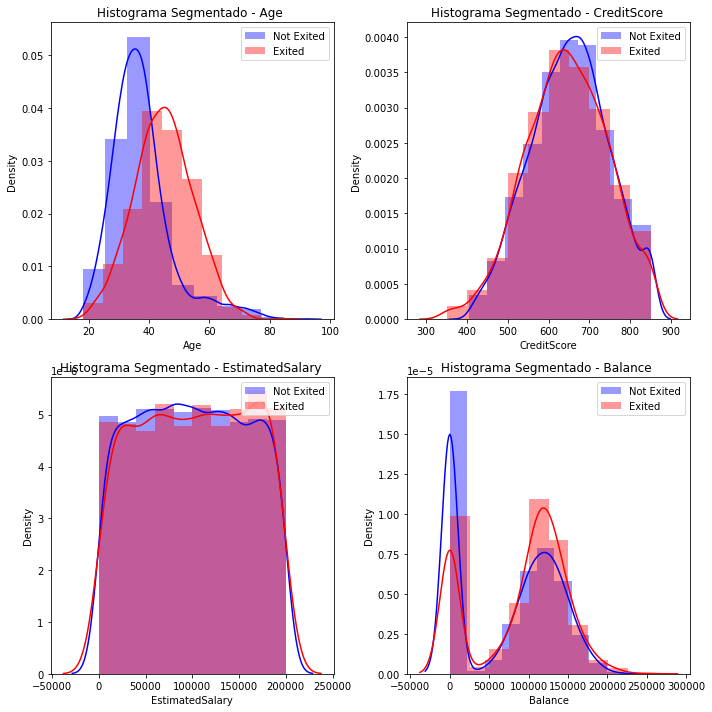

In [26]:
# Histograms: Age, CreditScore, Salary and Balance
variaveis_hist = ['Age','CreditScore','EstimatedSalary','Balance']
desenhar_hist(variaveis_hist)

In [27]:
# Boxplot: Age
px.box(
    data_frame = df,
    x = 'Exited',
    y = 'Age',
    color = 'Exited',
    height = 300, width = 650
    )

In [28]:
# Boxplot: Balance
px.box(
    data_frame = df,
    x = 'Exited',
    y = 'Balance',
    color = 'Exited',
    height = 300, width = 650
    )

In [29]:
# Boxplot: EstimatedSalary
px.box(
    data_frame = df,
    x = 'Exited',
    y = 'EstimatedSalary',
    color = 'Exited',
    height = 300, width = 650
    )

In [30]:
# Boxplot: CreditScore
px.box(
    data_frame = df,
    x = 'Exited',
    y = 'CreditScore',
    color = 'Exited',
    height = 300, width = 650
    )

In [31]:
# Boxplot: Tenure
px.box(
    data_frame = df,
    x = 'Exited',
    y = 'Tenure',
    color = 'Exited',
    height = 300, width = 650
    )

In [32]:
# Skew over Exited = 0
df[df['Exited']==0].skew(axis = 0, skipna = True)

RowNumber         -0.008387
CustomerId        -0.004113
CreditScore       -0.047016
Age                1.377699
Tenure             0.000749
Balance           -0.046887
NumOfProducts     -0.046615
HasCrCard         -0.910557
IsActiveMember    -0.219612
EstimatedSalary    0.010996
Exited             0.000000
dtype: float64

In [33]:
# Skew over Exited = 1
df[df['Exited']==1].skew(axis = 0, skipna = True)

RowNumber          0.031955
CustomerId         0.021887
CreditScore       -0.141078
Age                0.077978
Tenure             0.051920
Balance           -0.512732
NumOfProducts      1.570320
HasCrCard         -0.868672
IsActiveMember     0.580035
EstimatedSalary   -0.033104
Exited             0.000000
dtype: float64

In [34]:
# Geography: Exited x Not Exited
data_paises1 = df.groupby(['Geography','Exited']).agg({'CustomerId':'size'})
data_paises1.reset_index(inplace=True)

fig = go.Figure(
    data=[
      go.Bar(
          name='Exited', x=data_paises1[data_paises1['Exited'] == 1]['CustomerId'], y=data_paises1[data_paises1['Exited'] == 1]['Geography'], orientation = 'h',
          text = data_paises1[data_paises1['Exited'] == 1]['CustomerId'],textposition='auto'
          ),
      go.Bar(name='Not Exited', x=data_paises1[data_paises1['Exited'] == 0]['CustomerId'], y=data_paises1[data_paises1['Exited'] == 0]['Geography'], 
             orientation='h', text = data_paises1[data_paises1['Exited'] == 0]['CustomerId'] ,textposition='auto'
       )
  ]
)

fig.update_layout(
    barmode='group',
    xaxis = {'zeroline': False},
    title = 'Geography: Exited x Not Exited',width = 550
)
fig.show()

In [35]:
# Gender: Exited x Not Exited
data_gender1 = df.groupby(['Gender','Exited']).agg({'CustomerId':'size'})
data_gender1.reset_index(inplace=True)

fig = go.Figure(
    data=[
      go.Bar(
          name='Exited', x=data_gender1[data_gender1['Exited'] == 1]['CustomerId'], y=data_gender1[data_gender1['Exited'] == 1]['Gender'], orientation = 'h',
          text = data_gender1[data_gender1['Exited'] == 1]['CustomerId'],textposition='auto'
          ),
      go.Bar(name='Not Exited', x=data_gender1[data_gender1['Exited'] == 0]['CustomerId'], y=data_gender1[data_gender1['Exited'] == 0]['Gender'], 
             orientation='h', text = data_gender1[data_gender1['Exited'] == 0]['CustomerId'] ,textposition='auto'
       )
  ]
)

fig.update_layout(
    barmode='group',
    xaxis = {'zeroline': False},
    title = 'Gender: Exited x Not Exited',width = 550
)
fig.show()

In [36]:
# NumOfProducts: Exited x Not Exited
data_numofproducts1 = df.groupby(['NumOfProducts','Exited']).agg({'CustomerId':'size'})
data_numofproducts1.reset_index(inplace=True)

fig = go.Figure(
    data=[
      go.Bar(
          name='Exited', x=data_numofproducts1[data_numofproducts1['Exited'] == 1]['CustomerId'], y=data_numofproducts1[data_numofproducts1['Exited'] == 1]['NumOfProducts'], orientation = 'h',
          text=data_numofproducts1[data_numofproducts1['Exited'] == 1]['CustomerId'],textposition='auto'
          ),
      go.Bar(name='Not Exited', x=data_numofproducts1[data_numofproducts1['Exited'] == 0]['CustomerId'], y=data_numofproducts1[data_numofproducts1['Exited'] == 0]['NumOfProducts'], 
             orientation='h', text=data_numofproducts1[data_numofproducts1['Exited'] == 0]['CustomerId'] ,textposition='auto'
       )
  ]
)

fig.update_layout(
    barmode='group',
    xaxis = {'zeroline': False},
    title = 'NumOfProducts: Exited x Not Exited',width = 550
)
fig.show()

In [37]:
# HasCrCard: Exited x Not Exited
data_hascrcard1 = df.groupby(['HasCrCard','Exited']).agg({'CustomerId':'size'})
data_hascrcard1.reset_index(inplace=True)

fig = go.Figure(
    data=[
      go.Bar(
          name='Exited', x=data_hascrcard1[data_hascrcard1['Exited'] == 1]['CustomerId'], y=data_hascrcard1[data_hascrcard1['Exited'] == 1]['HasCrCard'], orientation = 'h',
          text=data_hascrcard1[data_hascrcard1['Exited'] == 1]['CustomerId'],textposition='auto'
          ),
      go.Bar(name='Not Exited', x=data_hascrcard1[data_hascrcard1['Exited'] == 0]['CustomerId'], y=data_hascrcard1[data_hascrcard1['Exited'] == 0]['HasCrCard'], 
             orientation='h', text=data_hascrcard1[data_hascrcard1['Exited'] == 0]['CustomerId'] ,textposition='auto'
       )
  ]
)

fig.update_layout(
    barmode='group',
    xaxis = {'zeroline': False},
    title = 'HasCrCard: Exited x Not Exited',width = 550
)
fig.show()

In [38]:
# IsActiveMember: Exited x Not Exited
data_isactivemember1 = df.groupby(['IsActiveMember','Exited']).agg({'CustomerId':'size'})
data_isactivemember1.reset_index(inplace=True)

fig = go.Figure(
    data=[
      go.Bar(
          name='Exited', x=data_isactivemember1[data_isactivemember1['Exited'] == 1]['CustomerId'], y=data_isactivemember1[data_isactivemember1['Exited'] == 1]['IsActiveMember'], orientation = 'h',
          text=data_isactivemember1[data_isactivemember1['Exited'] == 1]['CustomerId'],textposition='auto'
          ),
      go.Bar(name='Not Exited', x=data_isactivemember1[data_isactivemember1['Exited'] == 0]['CustomerId'], y=data_isactivemember1[data_isactivemember1['Exited'] == 0]['IsActiveMember'], 
             orientation='h', text=data_isactivemember1[data_isactivemember1['Exited'] == 0]['CustomerId'] ,textposition='auto'
       )
  ]
)

fig.update_layout(
    barmode='group',
    xaxis = {'zeroline': False},
    title = 'IsActiveMember: Exited x Not Exited',width = 550
)
fig.show()

## Correlations

In [39]:
def create_correlation(df, method):
    corr = df.corr(method=method)
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [40]:
colsToDrop = ['RowNumber','CustomerId']

In [41]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [3]:
# Scaling [ideally, it should be done after train-test split]
from sklearn.preprocessing import StandardScaler
scaled_df = df.copy()
scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaled_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

scaled_df['GenderInt'] = pd.factorize(df['Gender'])[0]
scaled_df['GeographyInt'] = pd.factorize(df['Geography'])[0]

In [4]:
scaled_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
GenderInt            int64
GeographyInt         int64
dtype: object

In [44]:
df_scaled_corr = scaled_df.drop(colsToDrop, axis=1)

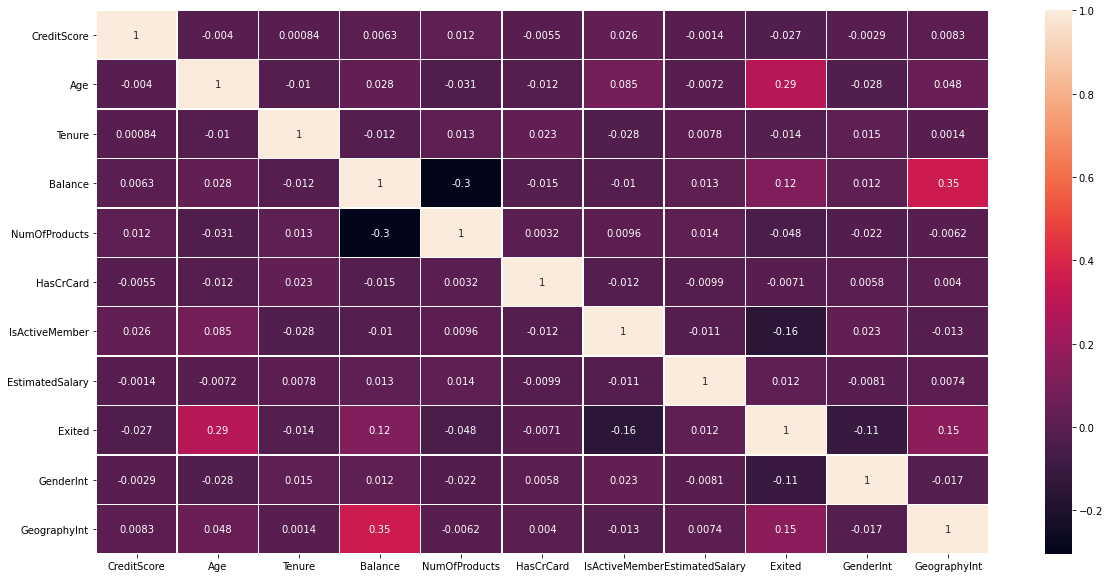

In [45]:
create_correlation(df=df_scaled_corr, method='pearson')

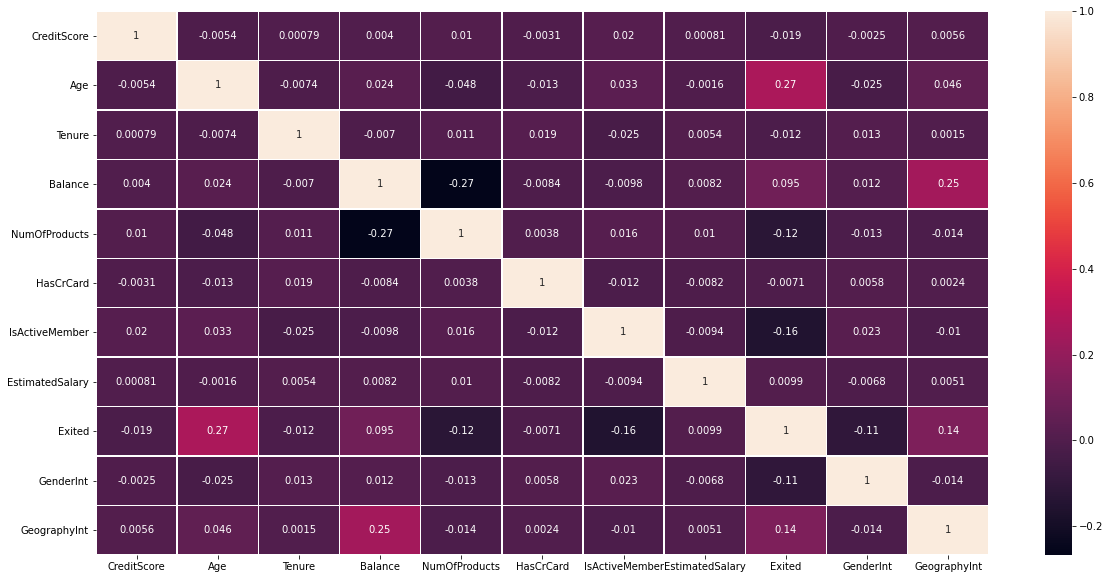

In [46]:
create_correlation(df=df_scaled_corr, method='kendall')

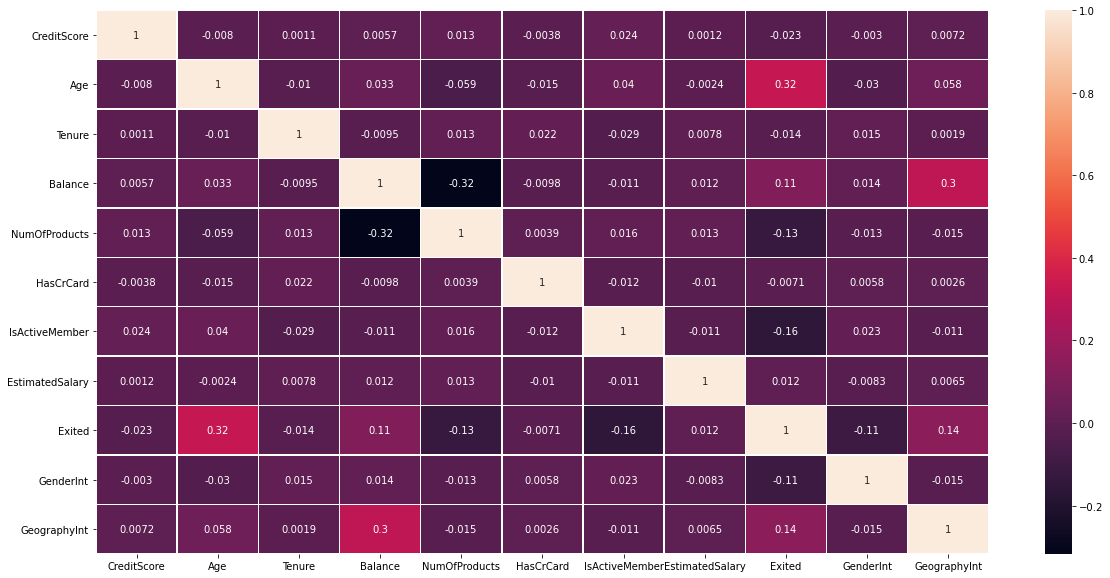

In [47]:
create_correlation(df=df_scaled_corr, method='spearman')

Stronger correlations with "Exited"

- Pearson: Age, IsActiveMember, Geography, Balance and Gender
- Kendall: Age, IsActiveMember, Geography, NumOfProducts, Gender and Balance
- Spearman: Age, IsActiveMember, Geography, NumOfProducts, Gender and Balance

# Segmentation

Based on the correlation analysis, we will use the following variables to segment the data:

- Client: Balance, NumberOfProducts
- Target Variable: Geography, Tenure, Age, IsActiveMember, Gender

In [48]:
df_new = df.copy()
df_new['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [49]:
# Segmentation: Balance
df_new['classif_balance'] = ''
df_new.loc[(df_new['Balance'] <= df_new['Balance'].quantile(0.25)),'classif_balance'] = 'Low Balance'
df_new.loc[(df_new['Balance'] >= df_new['Balance'].quantile(0.75)),'classif_balance'] = 'High Balance'
df_new.loc[((df_new['Balance'] > df_new['Balance'].quantile(0.25)) & (df_new['Balance'] < df_new['Balance'].quantile(0.75))),'classif_balance'] = 'Medium Balance'
df_new['classif_balance'].unique()

array(['Low Balance', 'Medium Balance', 'High Balance'], dtype=object)

In [50]:
# Function to define intervals

def define_intervals(x, interval, classes): 
  minimum = x.min()
  maximum = x.max()

  intervals = [minimum] + interval + [maximum]
  return pd.cut(x, bins = intervals, labels=classes, include_lowest=True)

In [51]:
# Variable Age
'''Age Intervals: 
  0-25 -> Young
  25-35 -> Young Adult
  35-55 -> Adult
  55-70 -> Mature Adult 
  Acima de 70 -> Elderly'''

intervals = [25,35,55,70]
categories = ['Young','Young Adult','Adult','Mature Adult','Elderly']

df_new['classif_age'] = define_intervals(df_new['Age'],intervals,categories)

In [52]:
# Variable Tenure
'''Tenure Intervals:
0-3 anos -> Low Tenure
3-7 -> Medium Tenure 
Acima de 7 -> High Tenure'''

intervals = [3,7]
categories = ['Low Tenure','Medium Tenure','High Tenure']
df_new['classif_tenure'] = define_intervals(df_new['Tenure'],intervals,categories)

In [53]:
# Categorical Types
df_new['classif_balance'] = df_new['classif_balance'].astype(CategoricalDtype(categories = ['Low Balance', 'Medium Balance', 'High Balance'],ordered=True))
df_new['classif_age'] = df_new['classif_age'].astype(CategoricalDtype(categories = ['Young','Young Adult','Adult','Mature Adult','Elderly'],ordered=True))
df_new['classif_tenure'] = df_new['classif_tenure'].astype(CategoricalDtype(categories = ['Low Tenure','Medium Tenure','High Tenure'],ordered=True))
df_new['NumOfProducts'] = df_new['NumOfProducts'].astype(CategoricalDtype(categories = [1,2,3,4],ordered=True))

In [54]:
def Population(x): return (len(x)/df_new.shape[0])*100
def Amount(x): return (round(((x.sum()/df_new['Balance'].sum())*100),2))

In [58]:
tab = df_new[['classif_balance','Balance']].pivot_table(index = ['classif_balance'], values = 'Balance', aggfunc = [Population, Amount])
tab

Population  Amount
                   Balance Balance
classif_balance                   
Low Balance          36.17    0.00
Medium Balance       38.83   51.28
High Balance         25.00   48.72

38.83% of the clients have medium balance. In fact, more than 60% of the clients have medium or high balance. On the other hand, 36.17% of the clients have no balance in their accounts. 51.28% of the bank's balance amount is concentrated within clients with medium balance.

In [59]:
tab1 = df_new[['classif_balance','NumOfProducts','Balance']].pivot_table(index = ['classif_balance','NumOfProducts'], values = 'Balance', aggfunc = [Population, Amount])
tab1

Population  Amount
                                 Balance Balance
classif_balance NumOfProducts                   
Low Balance     1                   9.05    0.00
                2                  26.00    0.00
                3                   0.98    0.00
                4                   0.14    0.00
Medium Balance  1                  25.36   33.56
                2                  12.19   16.03
                3                   1.02    1.34
                4                   0.26    0.36
High Balance    1                  16.43   31.95
                2                   7.71   15.10
                3                   0.66    1.29
                4                   0.20    0.38

Clients with medium or high balance, who own up to 2 products, represent 61.69% of the total nbr of clients. They concentrate 96.64% of the bank's balance amount.

In [60]:
tab2 = df_new[['classif_balance','NumOfProducts','Balance','Exited']].pivot_table(index = ['classif_balance','NumOfProducts'],
                                                                  columns = ['Exited'],
                                                                  values = 'Balance', aggfunc = [Population, Amount, np.size], margins = True)
tab2

Population                Amount                 \
Exited                                 0      1     All      0      1     All   
classif_balance NumOfProducts                                                   
Low Balance     1                   5.67   3.38    9.05   0.00   0.00    0.00   
                2                  25.14   0.86   26.00   0.00   0.00    0.00   
                3                   0.36   0.62    0.98   0.00   0.00    0.00   
                4                    NaN   0.14    0.14    NaN   0.00    0.00   
Medium Balance  1                  18.81   6.55   25.36  24.75   8.81   33.56   
                2                  10.50   1.69   12.19  13.76   2.26   16.03   
                3                   0.07   0.95    1.02   0.09   1.24    1.34   
                4                    NaN   0.26    0.26    NaN   0.36    0.36   
High Balance    1                  12.27   4.16   16.43  23.80   8.14   31.95   
                2                   6.78   0.93    7.71  13.26   1.84   15.10   
                3                   0.03   0.63    0.66   0.06   1.23    1.29   
                4                    NaN   0.20    0.20    NaN   0.38    0.38   
All                                79.63  20.37  100.00  75.74  24.26  100.00   

                                 size                   
Exited                              0       1      All  
classif_balance NumOfProducts                           
Low Balance     1               567.0   338.0    905.0  
                2              2514.0    86.0   2600.0  
                3                36.0    62.0     98.0  
                4                 NaN    14.0     14.0  
Medium Balance  1              1881.0   655.0   2536.0  
                2              1050.0   169.0   1219.0  
                3                 7.0    95.0    102.0  
                4                 NaN    26.0     26.0  
High Balance    1              1227.0   416.0   1643.0  
                2               678.0    93.0    771.0  
                3                 3.0    63.0     66.0  
                4                 NaN    20.0     20.0  
All                            7963.0  2037.0  10000.0

- Clients with medium or high balance, who own up to 2 products, have high incidence of churn. They represent 13.33% out of 20.37% of clients who left the bank.
- This group of clients owns 84% (21.05% out of 24.26%) of the bank's balance amount lost due to churn occorrence.

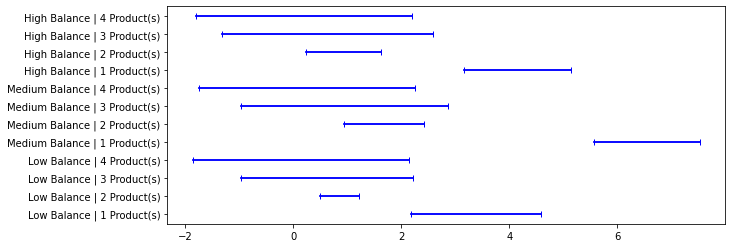

In [61]:
tabaux = tab2[[('Population',1),('size', 'All')]]
tabaux['LI - Churn'] = round(tabaux[('Population',1)]/100 - 2*np.sqrt(tabaux[('Population',1)]/100*(1-tabaux[('Population',1)]/100)/tabaux[('size','All')]),4)*100
tabaux['LS - Churn'] = round(tabaux[('Population',1)]/100 + 2*np.sqrt(tabaux[('Population',1)]/100*(1-tabaux[('Population',1)]/100)/tabaux[('size','All')]),4)*100

tabaux.reset_index(inplace=True)
tabaux.drop(index=12,inplace=True)
tabaux['Segment'] = tabaux['classif_balance'] +' | '+ tabaux['NumOfProducts'].astype(str)+' Product(s)'
tabaux['Segment1'] = tabaux['classif_balance'] +' | '+ tabaux['NumOfProducts'].astype(str)+' Product(s)'

fig, ax = plt.subplots(1,1,figsize=(10,4))

for each in range(len(tabaux)):
  ax.plot(tabaux[{'LI - Churn','LS - Churn'}].iloc[each,:],tabaux[{'Segment','Segment1'}].iloc[each,:],color='blue');
  ax.plot(tabaux[{'LI - Churn','LS - Churn'}].iloc[each,:],tabaux[{'Segment','Segment1'}].iloc[each,:],marker='|',color='blue');

The group of clients with medium balance and 1 product looks to differ statistically from the others. This could indicate specific strategies for this segment of clients.

In [62]:
df_exited = df_new[df_new['Exited']==1]

tab3 = df_exited.groupby(['classif_balance','NumOfProducts']).agg({'Exited':Population})
tab3.reset_index(inplace=True)

# Function to calculate the proportions of each category 
def calculaProp(column):
  values = df_exited[column].unique()

  def tot_categories(row):
    total_category = df_exited.loc[(df_exited['classif_balance'] == row['classif_balance'])&(df_exited['NumOfProducts'] == row['NumOfProducts'])].shape[0]
    total_column = df_exited.loc[(df_exited['classif_balance'] == row['classif_balance'])&(df_exited['NumOfProducts'] == row['NumOfProducts'])&(df_exited[column] == each)].shape[0]
    return (round(((total_column/total_category)*100),2))
  
  for each in values:
    tab3[column +' - '+ str(each)] = tab3.apply(tot_categories,axis=1) 
    

calculaProp('Geography')
calculaProp('classif_tenure')
calculaProp('Gender')
calculaProp('classif_age')
calculaProp('IsActiveMember')

In [63]:
tab3

classif_balance NumOfProducts  Exited  Geography - France  \
0      Low Balance             1    3.38               68.05   
1      Low Balance             2    0.86               69.77   
2      Low Balance             3    0.62               56.45   
3      Low Balance             4    0.14               85.71   
4   Medium Balance             1    6.55               26.87   
5   Medium Balance             2    1.69               26.04   
6   Medium Balance             3    0.95               33.68   
7   Medium Balance             4    0.26               26.92   
8     High Balance             1    4.16               37.98   
9     High Balance             2    0.93               33.33   
10    High Balance             3    0.63               23.81   
11    High Balance             4    0.20               50.00   

    Geography - Spain  Geography - Germany  classif_tenure - Low Tenure  \
0               31.95                 0.00                        36.98   
1               30.23                 0.00                        36.05   
2               43.55                 0.00                        45.16   
3               14.29                 0.00                        42.86   
4               15.27                57.86                        36.49   
5               19.53                54.44                        34.32   
6               10.53                55.79                        38.95   
7               11.54                61.54                        42.31   
8               14.18                47.84                        35.34   
9               30.11                36.56                        36.56   
10              23.81                52.38                        30.16   
11              10.00                40.00                        30.00   

    classif_tenure - High Tenure  classif_tenure - Medium Tenure  \
0                          20.12                           42.90   
1                          29.07                           34.88   
2                          19.35                           35.48   
3                          35.71                           21.43   
4                          26.87                           36.64   
5                          25.44                           40.24   
6                          26.32                           34.74   
7                          30.77                           26.92   
8                          25.72                           38.94   
9                          18.28                           45.16   
10                         31.75                           38.10   
11                         25.00                           45.00   

    Gender - Female  Gender - Male  classif_age - Adult  \
0             55.03          44.97                68.93   
1             65.12          34.88                63.95   
2             64.52          35.48                66.13   
3             57.14          42.86                78.57   
4             54.20          45.80                69.92   
5             57.99          42.01                68.05   
6             56.84          43.16                69.47   
7             65.38          34.62                73.08   
8             53.12          46.88                67.55   
9             60.22          39.78                61.29   
10            55.56          44.44                73.02   
11            65.00          35.00                70.00   

    classif_age - Young Adult  classif_age - Mature Adult  \
0                       15.38                       13.31   
1                       15.12                       16.28   
2                       12.90                       16.13   
3                        7.14                       14.29   
4                       14.81                       13.13   
5                       12.43                       15.38   
6                       10.53                       18.95   
7                       15.38                       1

Customer profiles with highest potential to leave the bank:

Profile 1 - Low Balance | 1 Product:

- Churn Percentage: 3.38%

For this segment, the profile of customers most likely to churn is concentrated in France and Spain (100%), being predominantly female (55%). These are mostly inactive members (66%) who have low or medium stay with the bank (80%), with age between 35 and 55 years (69%).

Profile 2 - Medium Balance | 1 Product:

- Churn Percentage: 6.55%

For this segment, the profile of customers most likely to churn is concentrated in France and Germany (85%), being predominantly female (54%). These are mostly inactive members (65%) who have low or medium stay with the bank (73%), with age between 35 and 55 years (70%).

Perfil 3 - High Balance | 1 Produto:

- Churn Percentage: 4.16%

For this segment, the profile of customers most likely to churn is concentrated in France and Germany (86%), being predominantly female (53%). These are mostly inactive members (67%) who have low or medium stay with the bank (74%), with age between 35 and 55 years (68%).



# Feature Selection

## Information Gain

In [64]:
# Function that calculates the impurity of a 'feature' using Entropy or Gini Index 
def compute_impurity(feature, impurity_criterion):
   
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))

In [65]:
# Calculation of entropy for the 'target feature' 

target_entropy = compute_impurity(df['Exited'], 'entropy')
target_entropy

0.729

In [66]:
# Function that calculates the information gain through the partition of the descriptive features of the dataset, according to specific impurity criteria 
# Split criterion: 'entropy', 'gini'

def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    #print('impurity of partitions:', entropy_list)
    #print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)


In [67]:
# Determining the gain of information through the 'Entropy' criterion 
split_criterion = 'entropy'
for feature in df.drop(columns=['Exited','RowNumber','CustomerId','Surname']).columns:
    feature_info_gain = comp_feature_information_gain(df, 'Exited', feature, split_criterion)

target feature: Exited
descriptive_feature: CreditScore
split criterion: entropy
remaining impurity: 0.70026
information gain: 0.028739999999999988
target feature: Exited
descriptive_feature: Geography
split criterion: entropy
remaining impurity: 0.7089970000000001
information gain: 0.020002999999999882
target feature: Exited
descriptive_feature: Gender
split criterion: entropy
remaining impurity: 0.7208180000000001
information gain: 0.008181999999999912
target feature: Exited
descriptive_feature: Age
split criterion: entropy
remaining impurity: 0.622277
information gain: 0.10672300000000001
target feature: Exited
descriptive_feature: Tenure
split criterion: entropy
remaining impurity: 0.727552
information gain: 0.0014480000000000048
target feature: Exited
descriptive_feature: Balance
split criterion: entropy
remaining impurity: 0.20995999999999998
information gain: 0.51904
target feature: Exited
descriptive_feature: NumOfProducts
split criterion: entropy
remaining impurity: 0.628377
i

In [68]:
# Determining the gain of information through the 'Gini Index' criterion 
split_criterion = 'gini'
for feature in df.drop(columns=['Exited','RowNumber','CustomerId','Surname']).columns:
    feature_info_gain = comp_feature_information_gain(df, 'Exited', feature, split_criterion)

target feature: Exited
descriptive_feature: CreditScore
split criterion: gini
remaining impurity: 0.312276
information gain: 0.011724000000000012
target feature: Exited
descriptive_feature: Geography
split criterion: gini
remaining impurity: 0.314653
information gain: 0.009346999999999994
target feature: Exited
descriptive_feature: Gender
split criterion: gini
remaining impurity: 0.32085400000000003
information gain: 0.003145999999999982
target feature: Exited
descriptive_feature: Age
split criterion: gini
remaining impurity: 0.272331
information gain: 0.05166900000000002
target feature: Exited
descriptive_feature: Tenure
split criterion: gini
remaining impurity: 0.323596
information gain: 0.00040400000000001546
target feature: Exited
descriptive_feature: Balance
split criterion: gini
remaining impurity: 0.086156
information gain: 0.237844
target feature: Exited
descriptive_feature: NumOfProducts
split criterion: gini
remaining impurity: 0.27569000000000005
information gain: 0.04830999

Ranking - Gain Information - Criterion: Entropy

- EstimatedSalary: 0.729
- Balance: 0.51904
- Age: 0.10672300000000001
- NumOfProducts: 0.10062300000000002
- CreditScore: 0.028739999999999988
- Geography: 0.020002999999999882
- IsActiveMember: 0.01772000000000007
- Gender: 0.008181999999999912
- Tenure: 0.0014480000000000048
- HasCrCard: -0.0005279999999999729

Ranking - Gain Information - Criterion: Gini Index

- EstimatedSalary: 0.324
- Balance: 0.237844
- Age: 0.05166900000000002
- NumOfProducts: 0.048309999999999964
- CreditScore: 0.011724000000000012
- Geography: 0.009346999999999994
- IsActiveMember: 0.007220000000000004
- Gender: 0.003145999999999982
- Tenure: 0.00040400000000001546
- HasCrCard: -0.00035199999999996345

There are no differences in the ranking of features, when comparing 'Entropy' and 'Gini Index' criterias.

## Recursive Feature Elimination

Recursive Feature Elimination (RFE) works by recursively removing the attributes and building a model on the attributes that remain.

This method uses the precision of the model to identify which attributes (and combination of attributes) contribute most to predicting the target variable.


In [69]:
X_scaled = scaled_df.drop(columns=['Exited','RowNumber','CustomerId','Surname','Geography','Gender'])
print(X_scaled.dtypes)
Y_scaled = scaled_df['Exited']      

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
rfe_model = LogisticRegression()
rfe = RFE(rfe_model, 3)
rfe_fit = rfe.fit(X_scaled, Y_scaled)
print("Num Features: %s" % (rfe_fit.n_features_))
print("Selected Features: %s" % (rfe_fit.support_))
print("Feature Ranking: %s" % (rfe_fit.ranking_))

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
GenderInt            int64
GeographyInt         int64
dtype: object
Num Features: 3
Selected Features: [False  True False False False False  True False  True False]
Feature Ranking: [4 1 6 3 5 7 1 8 1 2]


Strenght - Recursive Feature Elimination - Criteria: Logistic Regression

    CreditScore: 4 [Strength]
    Age: 1 [Strength]
    Tenure: 6 [Strength]
    Balance: 3 [Strength]
    NumOfProducts: 5 [Strength]
    HasCrCard: 7 [Strength]
    IsActiveMember: 1 [Strength]
    EstimatedSalary: 8 [Strength]
    GenderInt: 1 [Strength]
    GeographyInt: 2 [Strength]

'Age', 'IsActiveMember', 'Gender' are the strongest features [1]. Then, we have: 'Geography' [2], 'Balance' [3], 'CreditScore' [4], 'NumofProducts' [5], 'Tenure' [6], 'HasCrCard' [7], 'EstimatedSalary' [8]

## Ridge Regression

We will use Ridge regression to determine the coefficients R^2.

In a linear regression, the coefficient of determination R^2 is a relevant measure that represents the percentage of variation in the dependent variable that is explained by a set of independent variables. Thus, it measures the predictive capacity of the estimated model.

The coefficient of determination, which can be any value from -1 to 1, denotes the strength and direction of the relationship between the x value and the y value.

Coefficients of determination close to 0 indicate a weak or non-existent relationship.

Positive coefficients of determination indicate that there is a positive relationship: y generally increases with x.

Negative coefficients of determination indicate that there is a negative relationship: y generally decreases as x increases.


In [73]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, Y_scaled)

Ridge()

In [74]:
# Function to print the coefficients 
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [75]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.009 * X0 + 0.117 * X1 + -0.006 * X2 + 0.026 * X3 + -0.008 * X4 + -0.004 * X5 + -0.142 * X6 + 0.004 * X7 + -0.076 * X8 + 0.055 * X9


Positive Coefficients

- Age: 0.117
- GeographyInt: 0.055
- Balance: 0.026
- EstimatedSalary: 0.004

Negative Coefficients

- IsActiveMember: -0.142
- GenderInt: -0.076
- CreditScore: -0.009
- NumOfProducts: -0.008
- Tenure: -0.006
- HasCrCard: -0.004

## Chi-Squared Statistical Test for Categorical Variables

In [76]:
chi_squared_df = df.copy()

chi_squared_df['GenderInt'] = pd.factorize(chi_squared_df['Gender'])[0]
chi_squared_df['GeographyInt'] = pd.factorize(chi_squared_df['Geography'])[0]

X_chi_squared = chi_squared_df[['HasCrCard', 'IsActiveMember', 'GenderInt','GeographyInt']]

Y_chi_squared = chi_squared_df['Exited']

X_chi_squared.head()

HasCrCard  IsActiveMember  GenderInt  GeographyInt
0          1               1          0             0
1          0               1          0             1
2          1               0          0             0
3          0               0          0             0
4          1               1          0             1

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
chi_squared_test = SelectKBest(score_func=chi2, k=4) # selecting the k = 4 best features
chi_squared_fit = chi_squared_test.fit(X_chi_squared, Y_chi_squared)

# Summarize scores
np.set_printoptions(precision=3)
print(chi_squared_fit.scores_)

chi_squared_fit_features = chi_squared_fit.transform(X_chi_squared)
# Summarize selected features
print(chi_squared_fit_features[0:4,:])

[1.500e-01 1.182e+02 5.154e+01 2.175e+02]
[[1 1 0 0]
 [0 1 0 1]
 [1 0 0 0]
 [0 0 0 0]]


Feature Scores

    Geography: 217,5
    IsActiveMember: 118,2
    Gender: 51,54
    HasCrCard: 0,15

# Training

## Functions for training and testing

In [79]:
#!pip install scikit-optimize

In [5]:
# Experiments
experiments = dict()
score_function = recall_score
#score_function = f1_score

In [6]:
experiments['LogistRegression'] = {
     'model': LogisticRegression(),
     'space': {
         'model': [LogisticRegression()],
         # 'model__penalty': Categorical(['l2', 'none']),
         'model__solver': Categorical(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
     },
     'score_function': score_function
}

experiments['SVM'] = {
     'model': SVC(probability=True),
     'space': {
         'model': [SVC(probability=True)],
         'model__C': Real(0.1, 5),
         'model__kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
         'model__degree': Integer(1, 10),
         'model__gamma': Categorical(['scale', 'auto']),
     },
     'score_function': score_function
}

experiments['DecisionTreeClassifier'] = {
     'model': DecisionTreeClassifier(),
     'space': {
         'model': [DecisionTreeClassifier()],
         'model__criterion': Categorical(['gini', 'entropy']),
         'model__splitter': Categorical(['best', 'random']),
         'model__min_samples_split': Integer(2, 7),
         'model__max_features': Categorical(['auto', 'sqrt', 'log2']),
     },
     'score_function': score_function
}

'''
experiments['GaussianNaiveBayes'] = {
     'model': GaussianNB(),
     'space': {
         'model': [GaussianNB()],
         'model__var_smoothing': Real(1e-10, 1e-7),
     },
     'score_function': score_function
}
'''

experiments['KNN'] = {
     'model': KNeighborsClassifier(),
     'space': {
         'model': [KNeighborsClassifier()],
         'model__n_neighbors': Integer(3, 13),
         'model__weights': Categorical(['uniform', 'distance']),
         'model__algorithm': Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']),
         'model__leaf_size': Integer(20, 50),
         'model__p': Integer(1, 5),
     },
     'score_function': score_function
}

experiments['RandomForest'] = {
    'model': RandomForestClassifier(),
    'space': {
        'model': [RandomForestClassifier()],
        'model__n_estimators': Integer(10, 300),
        'model__criterion': Categorical(['gini', 'entropy']),
        'model__min_samples_split': Integer(2, 7),
        'model__max_features': Categorical(['auto', 'sqrt', 'log2']),
        'model__bootstrap': Integer(0, 1),
    },
    'score_function': score_function
}

experiments['Perceptron'] = {
     'model': Perceptron(),
     'space': {
         'model': [Perceptron()],
         'model__penalty': Categorical(['l2', 'l1', 'elasticnet']),
         'model__alpha': Real(0.0001, 0.01),
         'model__fit_intercept': Integer(0, 1),
         'model__max_iter': Integer(500, 3000),
         'model__eta0': Real(0.5, 2),
         'model__validation_fraction': Real(0.1, 0.3),
         'model__warm_start': Integer(0, 1),
     },
     'score_function': score_function
}

experiments['MLP'] = {
     'model': MLPClassifier(),
     'space': {
         'model': [MLPClassifier()],
         'model__activation': Categorical(['identity', 'logistic', 'tanh', 'relu']),
         'model__solver': Categorical(['lbfgs', 'sgd', 'adam']),
         'model__alpha': Real(0.0001, 0.001),
         'model__learning_rate': Categorical(['constant', 'invscaling', 'adaptive']),
     },
     'score_function': score_function
}

In [7]:
experiments

{'LogistRegression': {'model': LogisticRegression(),
  'space': {'model': [LogisticRegression()],
   'model__solver': Categorical(categories=('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), prior=None)},
  'score_function': <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>},
 'SVM': {'model': SVC(probability=True),
  'space': {'model': [SVC(probability=True)],
   'model__C': Real(low=0.1, high=5, prior='uniform', transform='identity'),
   'model__kernel': Categorical(categories=('linear', 'poly', 'rbf', 'sigmoid'), prior=None),
   'model__degree': Integer(low=1, high=10, prior='uniform', transform='identity'),
   'model__gamma': Categorical(categories=('scale', 'auto'), prior=None)},
  'score_function': <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>},
 'Decision

In [8]:
# Selection of the best hyperparameters
def train_model(model, space, X, y, score_function, cv=5, n_calls=40):
    opt = BayesSearchCV(Pipeline([('model', model)]),
                        # (parameter space, # of evaluations)
                        [(space, n_calls)],
                        cv=cv,
                        scoring=make_scorer(score_function),
                        verbose=0,
                        n_jobs=-1
                       )
    opt.fit(X, y)
    return opt

In [9]:
def apply_models(X_train,X_test,y_train,y_test, show_explanation=False):

    labels = scaled_df['Exited'].values
    result_df = None
    
    for axis_index, experiment_name in enumerate(experiments):
        experiment = experiments[experiment_name]
        print('\n###### [{}] ######'.format(experiment_name))
        results_dict = dict()
        results_dict['model'] = [experiment_name]
      
        start_time = time.time()
        skopt_res = train_model(model=experiment['model'], space=experiment['space'], X=X_train, y=y_train, 
                                score_function=experiment['score_function'])
        training_time = time.time() - start_time
        results_dict['training_time'] = [training_time]
      
        print("Training time: {:.2f}s".format(training_time))
      
        print("Best training score {:.4f} using {}".format(skopt_res.best_score_, experiment['score_function'].__name__))
      
        for score_method in [f1_score, accuracy_score, recall_score, precision_score]:
            tmp_score = score_method(skopt_res.best_estimator_.predict(X_test), y_test)
            print("Test score for {}: {:.4f}".format(score_method.__name__, tmp_score))
            results_dict[score_method.__name__] = [tmp_score]

        if show_explanation:
            try:
                explainer = shap.KernelExplainer(skopt_res.best_estimator_.predict_proba, shap.kmeans(X_test, 10))
                shap_values = explainer.shap_values(X_test)
                shap.summary_plot(shap_values=shap_values, features=X_test, feature_names=columns_to_train, plot_type="bar")
            except Exception:
                pass
      
        cf_matrix = confusion_matrix(skopt_res.best_estimator_.predict(X_test), y_test)
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ['{0:0.0f}'.format(value) for value in
                      cf_matrix.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in
                          cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)

        for group_name, group_count, group_percentage in zip(group_names, group_counts, group_percentages):
            results_dict[group_name] = [group_count]
            results_dict[group_name + ' Percentage'] = [group_percentage]


        ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
        ax.set(xlabel='Pred label', ylabel='True label')
        plt.show()

        print("Best Params: {}".format(str(skopt_res.best_params_)))
        results_dict['best_params'] = [str(skopt_res.best_params_)]

        ###
        
        print('\n','Results per Class:')
        class_report = classification_report(y_test,skopt_res.best_estimator_.predict(X_test),output_dict = True)
        print('\n',classification_report(y_test,skopt_res.best_estimator_.predict(X_test)))

        results_dict['precision_nchurn'] = class_report['0']['precision']
        results_dict['precision_churn'] = class_report['1']['precision']
        results_dict['recall_nchurn'] = class_report['0']['recall']
        results_dict['recall_churn'] = class_report['1']['recall']
        results_dict['f1score_nchurn'] = class_report['0']['f1-score']
        results_dict['f1score_churn'] = class_report['1']['f1-score']
        
        ####

        temp_df = pd.DataFrame(results_dict)
        if result_df is None:
            result_df = temp_df.copy()
        else:
            result_df = pd.concat([result_df, temp_df])
        #return skopt_res

    return result_df     

## Unbalanced Data

In [103]:
columns = scaled_df.columns.values
columns_to_remove = ['RowNumber', 'CustomerId', 'Surname', 'Gender', 'Geography', 'Exited']
columns_to_train = list(set(columns) - set(columns_to_remove))
print('columns_to_train: ', columns_to_train)

X = scaled_df[columns_to_train].to_numpy()
y = scaled_df['Exited']

X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_train:  ['Balance', 'EstimatedSalary', 'Age', 'HasCrCard', 'GeographyInt', 'Tenure', 'GenderInt', 'CreditScore', 'IsActiveMember', 'NumOfProducts']


0    6356
1    1644
Name: Exited, dtype: int64


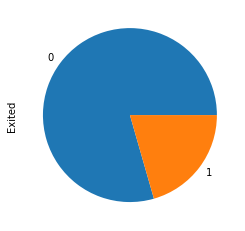

In [104]:
# Checking proportions 
y_train_db.value_counts().plot(kind = 'pie')
print(y_train_db.value_counts())


###### [LogistRegression] ######
Training time: 27.12s
Best training score 0.2086 using recall_score
Test score for f1_score: 0.3137
Test score for accuracy_score: 0.8140
Test score for recall_score: 0.5705
Test score for precision_score: 0.2163


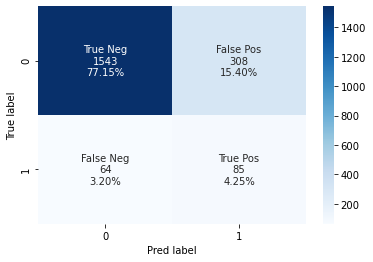

Best Params: OrderedDict([('model', LogisticRegression(solver='liblinear')), ('model__solver', 'liblinear')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.22      0.31       393

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000


###### [SVM] ######
Training time: 272.56s
Best training score 0.4398 using recall_score
Test score for f1_score: 0.5787
Test score for accuracy_score: 0.8675
Test score for recall_score: 0.7712
Test score for precision_score: 0.4631


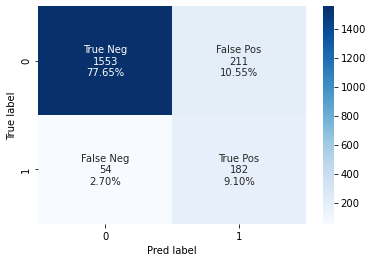

Best Params: OrderedDict([('model', SVC(C=5.0, degree=4, probability=True)), ('model__C', 5.0), ('model__degree', 4), ('model__gamma', 'scale'), ('model__kernel', 'rbf')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


###### [DecisionTreeClassifier] ######
Training time: 38.68s
Best training score 0.5140 using recall_score
Test score for f1_score: 0.4838
Test score for accuracy_score: 0.7930
Test score for recall_score: 0.4743
Test score for precision_score: 0.4936


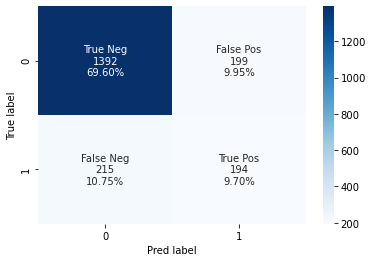

Best Params: OrderedDict([('model', DecisionTreeClassifier(criterion='entropy', max_features='auto')), ('model__criterion', 'entropy'), ('model__max_features', 'auto'), ('model__min_samples_split', 2), ('model__splitter', 'best')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1607
           1       0.47      0.49      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.80      0.79      0.79      2000


###### [KNN] ######
Training time: 66.72s
Best training score 0.4696 using recall_score
Test score for f1_score: 0.5493
Test score for accuracy_score: 0.8400
Test score for recall_score: 0.6151
Test score for precision_score: 0.4962


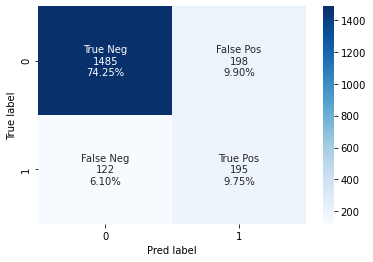

Best Params: OrderedDict([('model', KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=3, weights='distance')), ('model__algorithm', 'auto'), ('model__leaf_size', 25), ('model__n_neighbors', 3), ('model__p', 3), ('model__weights', 'distance')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1607
           1       0.62      0.50      0.55       393

    accuracy                           0.84      2000
   macro avg       0.75      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000


###### [RandomForest] ######
Training time: 96.03s
Best training score 0.4909 using recall_score
Test score for f1_score: 0.5991
Test score for accuracy_score: 0.8635
Test score for recall_score: 0.7083
Test score for precision_score: 0.5191


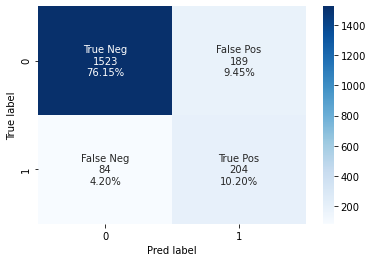

Best Params: OrderedDict([('model', RandomForestClassifier(bootstrap=0, criterion='entropy', min_samples_split=7,
                       n_estimators=14)), ('model__bootstrap', 0), ('model__criterion', 'entropy'), ('model__max_features', 'auto'), ('model__min_samples_split', 7), ('model__n_estimators', 14)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000


###### [Perceptron] ######
Training time: 41.50s
Best training score 0.5437 using recall_score
Test score for f1_score: 0.4881
Test score for accuracy_score: 0.7535
Test score for recall_score: 0.4123
Test score for precision_score: 0.5980


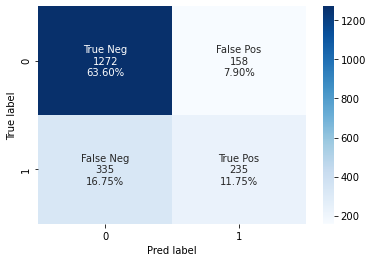

Best Params: OrderedDict([('model', Perceptron(alpha=0.00012545470955124897, eta0=1.7997318884148024,
           fit_intercept=0, max_iter=2857, penalty='elasticnet',
           validation_fraction=0.29499066390691203, warm_start=0)), ('model__alpha', 0.00012545470955124897), ('model__eta0', 1.7997318884148024), ('model__fit_intercept', 0), ('model__max_iter', 2857), ('model__penalty', 'elasticnet'), ('model__validation_fraction', 0.29499066390691203), ('model__warm_start', 0)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1607
           1       0.41      0.60      0.49       393

    accuracy                           0.75      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.80      0.75      0.77      2000


###### [MLP] ######
Training time: 203.52s
Best training score 0.5231 using recall_score
Test score for f1_score: 0.5568
Test score for accuracy_score: 0.8360
Test s

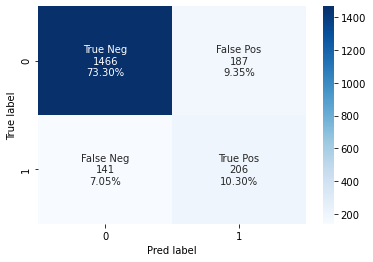

Best Params: OrderedDict([('model', MLPClassifier(activation='tanh', alpha=0.000864925882454706,
              learning_rate='adaptive', solver='lbfgs')), ('model__activation', 'tanh'), ('model__alpha', 0.000864925882454706), ('model__learning_rate', 'adaptive'), ('model__solver', 'lbfgs')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1607
           1       0.59      0.52      0.56       393

    accuracy                           0.84      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [105]:
unbalanced_res = apply_models(X_train_db, X_test_db, y_train_db, y_test_db) 

In [106]:
unbalanced_res.sort_values(by=['recall_churn'], ascending=False)

model  training_time  f1_score  accuracy_score  \
0              Perceptron      41.498419  0.488058          0.7535   
0                     MLP     203.518898  0.556757          0.8360   
0            RandomForest      96.027210  0.599119          0.8635   
0                     KNN      66.722165  0.549296          0.8400   
0  DecisionTreeClassifier      38.677480  0.483791          0.7930   
0                     SVM     272.557777  0.578696          0.8675   
0        LogistRegression      27.121517  0.313653          0.8140   

   recall_score  precision_score True Neg True Neg Percentage False Pos  \
0      0.412281         0.597964     1272              63.60%       158   
0      0.593660         0.524173     1466              73.30%       187   
0      0.708333         0.519084     1523              76.15%       189   
0      0.615142         0.496183     1485              74.25%       198   
0      0.474328         0.493639     1392              69.60%       199   
0      0.771186         0.463104     1553              77.65%       211   
0      0.570470         0.216285     1543              77.15%       308   

  False Pos Percentage  ... False Neg Percentage True Pos True Pos Percentage  \
0                7.90%  ...               16.75%      235              11.75%   
0                9.35%  ...                7.05%      206              10.30%   
0                9.45%  ...                4.20%      204              10.20%   
0                9.90%  ...                6.10%      195               9.75%   
0                9.95%  ...               10.75%      194               9.70%   
0               10.55%  ...                2.70%      182               9.10%   
0               15.40%  ...                3.20%       85               4.25%   

                                         best_params precision_nchurn  \
0  OrderedDict([('model', Perceptron(alpha=0.0001...         0.889510   
0  OrderedDict([('model', MLPClassifier(activatio...         0.886872   
0  OrderedDict([('model', RandomForestClassifier(...         0.889603   
0  OrderedDict([('model', KNeighborsClassifier(le...         0.882353   
0  OrderedDict([('model', DecisionTreeClassifier(...         0.874921   
0  OrderedDict([('model', SVC(C=5.0, degree=4, pr...         0.880385   
0  OrderedDict([('model', LogisticRegression(solv...         0.833603   

   precision_churn  recall_nchurn  recall_churn  f1score_nchurn  f1score_churn  
0         0.412281       0.791537      0.597964        0.837669       0.488058  
0         0.593660       0.912259      0.524173        0.899387       0.556757  
0         0.708333       0.947729      0.519084        0.917746       0.599119  
0         0.615142       0.924082      0.496183        0.902736       0.549296  
0         0.474328       0.866210      0.493639        0.870544       0.483791  
0         0.771186       0.966397      0.463104        0.921388       0.578696  
0         0.570470       0.960174      0.216285        0.892423       0.313653  

[7 rows x 21 columns]

## Subsampling

In [107]:
class_0 = scaled_df[scaled_df['Exited'] == 0]
class_1 = scaled_df[scaled_df['Exited'] == 1]

sample_size = min(len(class_0), len(class_1))

train_dataset = pd.concat([class_0.sample(n=sample_size, replace=False),
                           class_1.sample(n=sample_size, replace=False)])

print(sample_size)

2037


In [109]:
columns = scaled_df.columns.values
columns_to_remove = ['RowNumber', 'CustomerId', 'Surname', 'Gender', 'Geography', 'Exited']
columns_to_train = list(set(columns) - set(columns_to_remove))
print('columns_to_train: ', columns_to_train)

X = train_dataset[columns_to_train].to_numpy()
y = train_dataset['Exited']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_train:  ['Balance', 'EstimatedSalary', 'Age', 'HasCrCard', 'GeographyInt', 'Tenure', 'GenderInt', 'CreditScore', 'IsActiveMember', 'NumOfProducts']


1    1665
0    1594
Name: Exited, dtype: int64


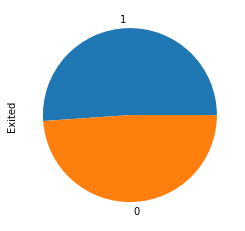

In [110]:
# Checking proportions 
y_train_sub.value_counts().plot(kind = 'pie')
print(y_train_sub.value_counts())


###### [LogistRegression] ######
Training time: 23.87s
Best training score 0.7081 using recall_score
Test score for f1_score: 0.7013
Test score for accuracy_score: 0.7252
Test score for recall_score: 0.6958
Test score for precision_score: 0.7070


  0%|          | 0/815 [00:00<?, ?it/s]

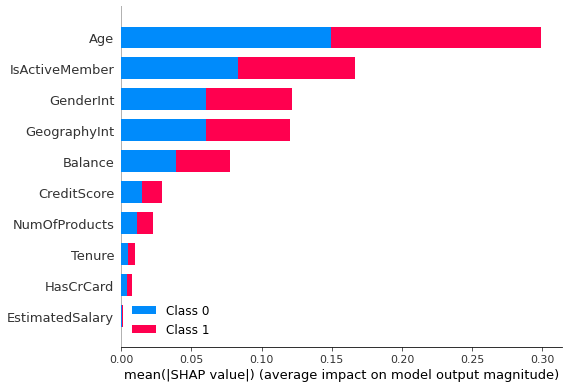

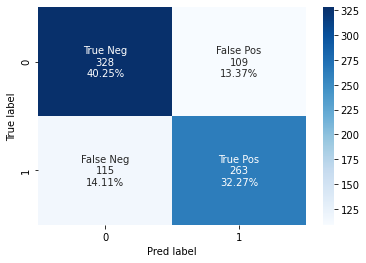

Best Params: OrderedDict([('model', LogisticRegression(solver='liblinear')), ('model__solver', 'liblinear')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.75      0.74      0.75       443
           1       0.70      0.71      0.70       372

    accuracy                           0.73       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.73      0.73      0.73       815


###### [SVM] ######
Training time: 84.10s
Best training score 0.7718 using recall_score
Test score for f1_score: 0.7563
Test score for accuracy_score: 0.7730
Test score for recall_score: 0.7416
Test score for precision_score: 0.7715


  0%|          | 0/815 [00:00<?, ?it/s]

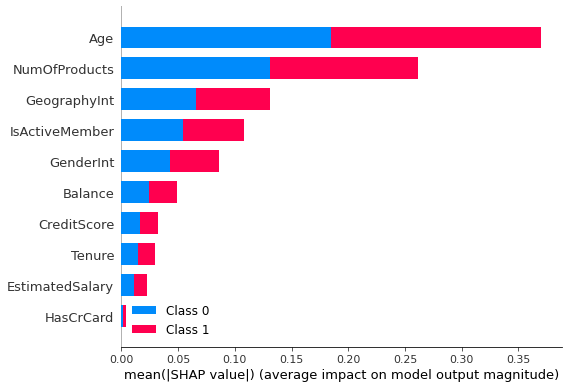

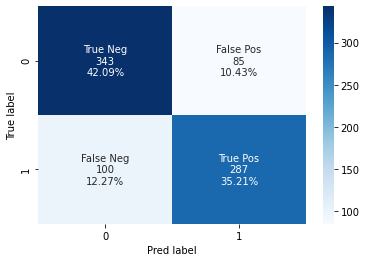

Best Params: OrderedDict([('model', SVC(C=0.1, degree=1, probability=True)), ('model__C', 0.1), ('model__degree', 1), ('model__gamma', 'scale'), ('model__kernel', 'rbf')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.80      0.77      0.79       443
           1       0.74      0.77      0.76       372

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815


###### [DecisionTreeClassifier] ######
Training time: 46.06s
Best training score 0.7033 using recall_score
Test score for f1_score: 0.7005
Test score for accuracy_score: 0.7178
Test score for recall_score: 0.6793
Test score for precision_score: 0.7231


  0%|          | 0/815 [00:00<?, ?it/s]

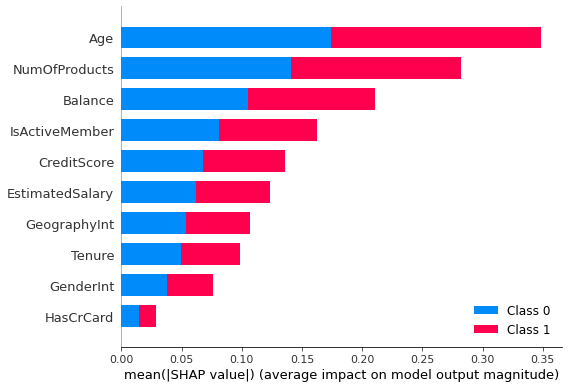

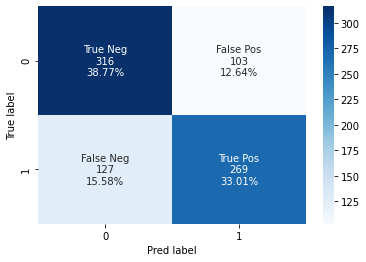

Best Params: OrderedDict([('model', DecisionTreeClassifier(max_features='sqrt')), ('model__criterion', 'gini'), ('model__max_features', 'sqrt'), ('model__min_samples_split', 2), ('model__splitter', 'best')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.75      0.71      0.73       443
           1       0.68      0.72      0.70       372

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815


###### [KNN] ######
Training time: 46.26s
Best training score 0.7628 using recall_score
Test score for f1_score: 0.7609
Test score for accuracy_score: 0.7779
Test score for recall_score: 0.7481
Test score for precision_score: 0.7742


  0%|          | 0/815 [00:00<?, ?it/s]

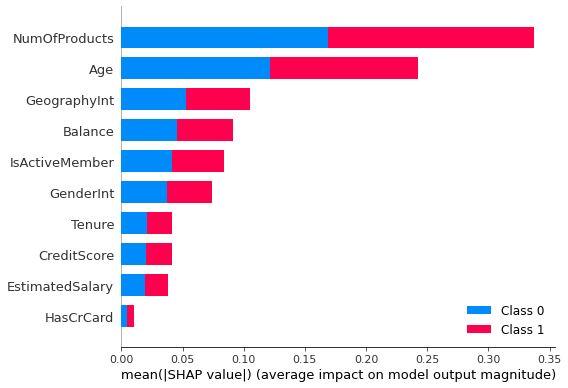

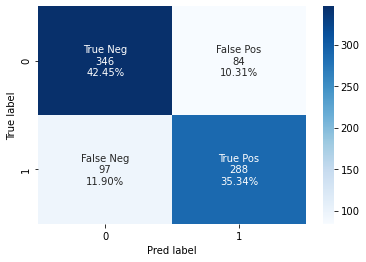

Best Params: OrderedDict([('model', KNeighborsClassifier(algorithm='kd_tree', leaf_size=50, n_neighbors=13, p=5,
                     weights='distance')), ('model__algorithm', 'kd_tree'), ('model__leaf_size', 50), ('model__n_neighbors', 13), ('model__p', 5), ('model__weights', 'distance')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.80      0.78      0.79       443
           1       0.75      0.77      0.76       372

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815


###### [RandomForest] ######
Training time: 67.82s
Best training score 0.7598 using recall_score
Test score for f1_score: 0.7632
Test score for accuracy_score: 0.7853
Test score for recall_score: 0.7684
Test score for precision_score: 0.7581


  0%|          | 0/815 [00:00<?, ?it/s]

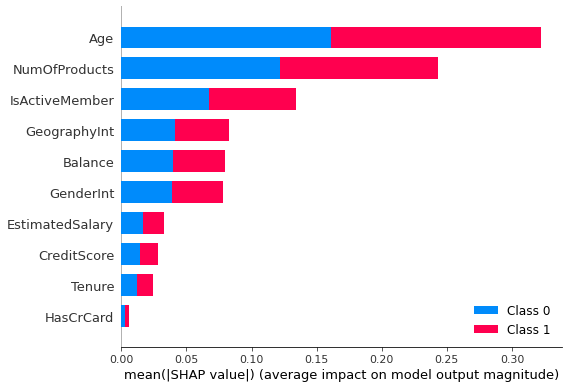

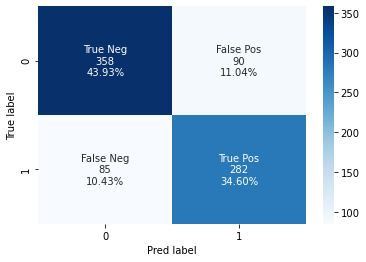

Best Params: OrderedDict([('model', RandomForestClassifier(bootstrap=1, min_samples_split=6, n_estimators=271)), ('model__bootstrap', 1), ('model__criterion', 'gini'), ('model__max_features', 'auto'), ('model__min_samples_split', 6), ('model__n_estimators', 271)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.80      0.81      0.80       443
           1       0.77      0.76      0.76       372

    accuracy                           0.79       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.79      0.79      0.79       815


###### [Perceptron] ######
Training time: 41.22s
Best training score 0.9225 using recall_score
Test score for f1_score: 0.5724
Test score for accuracy_score: 0.6957
Test score for recall_score: 0.7981
Test score for precision_score: 0.4462


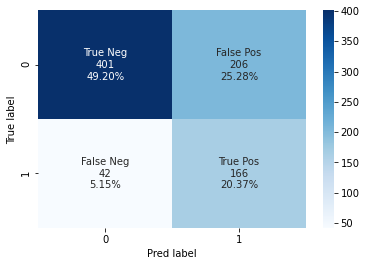

Best Params: OrderedDict([('model', Perceptron(alpha=0.007792927189065682, eta0=0.8756937179668485, fit_intercept=1,
           max_iter=2804, penalty='l1', validation_fraction=0.21923273506505092,
           warm_start=1)), ('model__alpha', 0.007792927189065682), ('model__eta0', 0.8756937179668485), ('model__fit_intercept', 1), ('model__max_iter', 2804), ('model__penalty', 'l1'), ('model__validation_fraction', 0.21923273506505092), ('model__warm_start', 1)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.66      0.91      0.76       443
           1       0.80      0.45      0.57       372

    accuracy                           0.70       815
   macro avg       0.73      0.68      0.67       815
weighted avg       0.72      0.70      0.68       815


###### [MLP] ######
Training time: 99.25s
Best training score 0.7754 using recall_score
Test score for f1_score: 0.7641
Test score for accuracy_score: 0.7840
Test score for recall_score

  0%|          | 0/815 [00:00<?, ?it/s]

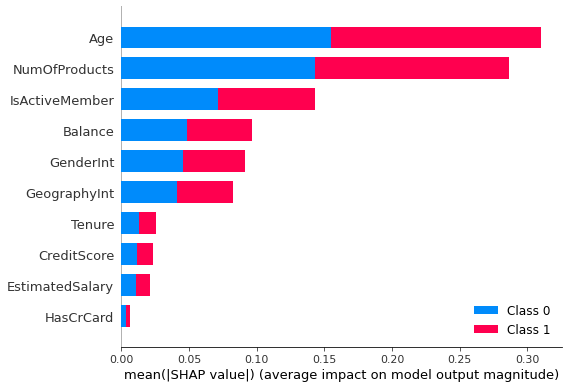

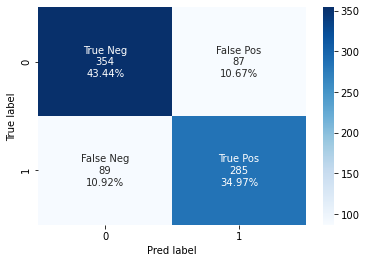

Best Params: OrderedDict([('model', MLPClassifier(activation='tanh', alpha=0.0009967149131213365,
              learning_rate='adaptive')), ('model__activation', 'tanh'), ('model__alpha', 0.0009967149131213365), ('model__learning_rate', 'adaptive'), ('model__solver', 'adam')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.80      0.80      0.80       443
           1       0.76      0.77      0.76       372

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815



In [111]:
subsampling_res = apply_models(X_train_sub, X_test_sub, y_train_sub, y_test_sub, show_explanation=True)

In [112]:
subsampling_res.sort_values(by=['recall_churn'], ascending=False)

model  training_time  f1_score  accuracy_score  \
0                     KNN      46.258772  0.760898        0.777914   
0                     SVM      84.103379  0.756258        0.773006   
0                     MLP      99.247218  0.764075        0.784049   
0            RandomForest      67.815410  0.763194        0.785276   
0  DecisionTreeClassifier      46.063172  0.700521        0.717791   
0        LogistRegression      23.865833  0.701333        0.725153   
0              Perceptron      41.223425  0.572414        0.695706   

   recall_score  precision_score True Neg True Neg Percentage False Pos  \
0      0.748052         0.774194      346              42.45%        84   
0      0.741602         0.771505      343              42.09%        85   
0      0.762032         0.766129      354              43.44%        87   
0      0.768392         0.758065      358              43.93%        90   
0      0.679293         0.723118      316              38.77%       103   
0      0.695767         0.706989      328              40.25%       109   
0      0.798077         0.446237      401              49.20%       206   

  False Pos Percentage  ... False Neg Percentage True Pos True Pos Percentage  \
0               10.31%  ...               11.90%      288              35.34%   
0               10.43%  ...               12.27%      287              35.21%   
0               10.67%  ...               10.92%      285              34.97%   
0               11.04%  ...               10.43%      282              34.60%   
0               12.64%  ...               15.58%      269              33.01%   
0               13.37%  ...               14.11%      263              32.27%   
0               25.28%  ...                5.15%      166              20.37%   

                                         best_params precision_nchurn  \
0  OrderedDict([('model', KNeighborsClassifier(al...         0.804651   
0  OrderedDict([('model', SVC(C=0.1, degree=1, pr...         0.801402   
0  OrderedDict([('model', MLPClassifier(activatio...         0.802721   
0  OrderedDict([('model', RandomForestClassifier(...         0.799107   
0  OrderedDict([('model', DecisionTreeClassifier(...         0.754177   
0  OrderedDict([('model', LogisticRegression(solv...         0.750572   
0  OrderedDict([('model', Perceptron(alpha=0.0077...         0.660626   

   precision_churn  recall_nchurn  recall_churn  f1score_nchurn  f1score_churn  
0         0.748052       0.781038      0.774194        0.792669       0.760898  
0         0.741602       0.774266      0.771505        0.787600       0.756258  
0         0.762032       0.799097      0.766129        0.800905       0.764075  
0         0.768392       0.808126      0.758065        0.803591       0.763194  
0         0.679293       0.713318      0.723118        0.733179       0.700521  
0         0.695767       0.740406      0.706989        0.745455       0.701333  
0         0.798077       0.905192      0.446237        0.763810       0.572414  

[7 rows x 21 columns]

## Oversampling

In [10]:
columns = scaled_df.columns.values
columns_to_remove = ['RowNumber', 'CustomerId', 'Surname', 'Gender', 'Geography', 'Exited']
columns_to_train = list(set(columns) - set(columns_to_remove))
print('columns_to_train: ', columns_to_train)

X = scaled_df[columns_to_train]
y = scaled_df['Exited']

X_train_ovs, X_test_ovs, y_train_ovs, y_test_ovs = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_train:  ['GeographyInt', 'Balance', 'IsActiveMember', 'HasCrCard', 'CreditScore', 'NumOfProducts', 'Age', 'EstimatedSalary', 'GenderInt', 'Tenure']


In [11]:
'''
train_data = X_train_ovs.copy()
train_data['HasCrCard'] = train_data['HasCrCard'].astype(CategoricalDtype(categories = [0,1],ordered=False))
train_data['GenderInt'] = train_data['GenderInt'].astype(CategoricalDtype(categories = [0,1],ordered=False))
train_data['IsActiveMember'] = train_data['IsActiveMember'].astype(CategoricalDtype(categories = [0,1],ordered=False))
train_data['GeographyInt'] = train_data['GeographyInt'].astype(CategoricalDtype(categories = [0,1,2],ordered=False))
'''

"\ntrain_data = X_train_ovs.copy()\ntrain_data['HasCrCard'] = train_data['HasCrCard'].astype(CategoricalDtype(categories = [0,1],ordered=False))\ntrain_data['GenderInt'] = train_data['GenderInt'].astype(CategoricalDtype(categories = [0,1],ordered=False))\ntrain_data['IsActiveMember'] = train_data['IsActiveMember'].astype(CategoricalDtype(categories = [0,1],ordered=False))\ntrain_data['GeographyInt'] = train_data['GeographyInt'].astype(CategoricalDtype(categories = [0,1,2],ordered=False))\n"

In [12]:
#pd.DataFrame(train_data).isnull().any()

In [13]:
#!pip install imbalanced-learn --user

In [14]:
#!pip install sklearn

In [15]:
# SMOTENC Method

# Importing SMOTE-NC  
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([4,5,8,9],random_state = 1)  
X_oversample, y_oversample = smotenc.fit_resample(X_train_ovs, y_train_ovs)

0    6356
1    6356
Name: Exited, dtype: int64


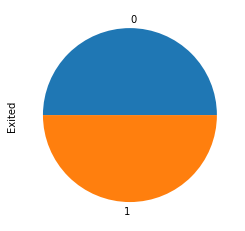

In [16]:
# Checking proportions

y_oversample.value_counts().plot(kind = 'pie')
print(y_oversample.value_counts())

In [17]:
pd.DataFrame(X_oversample).isnull().any()

GeographyInt       False
Balance            False
IsActiveMember     False
HasCrCard          False
CreditScore        False
NumOfProducts      False
Age                False
EstimatedSalary    False
GenderInt          False
Tenure             False
dtype: bool

In [18]:
#X_oversample = pd.DataFrame(X_oversample).replace(np.nan, pd.DataFrame(X_oversample).mean())

# Filling with most occurring class
#X_oversample = X_oversample.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [19]:
#pd.DataFrame(X_oversample).isnull().any()


###### [LogistRegression] ######
Training time: 30.92s
Best training score 0.7248 using recall_score
Test score for f1_score: 0.4958
Test score for accuracy_score: 0.7285
Test score for recall_score: 0.3904
Test score for precision_score: 0.6794


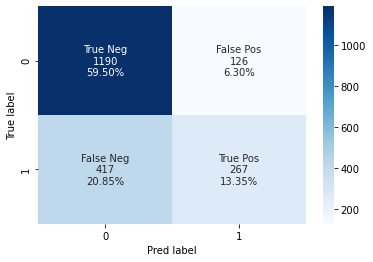

Best Params: OrderedDict([('model', LogisticRegression(solver='sag')), ('model__solver', 'sag')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1607
           1       0.39      0.68      0.50       393

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.73      0.75      2000


###### [SVM] ######
Training time: 788.78s
Best training score 0.8442 using recall_score
Test score for f1_score: 0.5731
Test score for accuracy_score: 0.7750
Test score for recall_score: 0.4569
Test score for precision_score: 0.7684


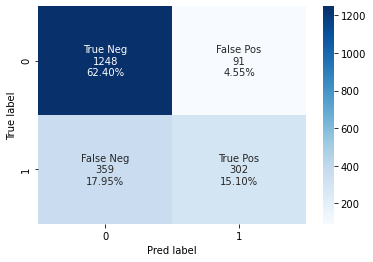

Best Params: OrderedDict([('model', SVC(C=5.0, degree=1, probability=True)), ('model__C', 5.0), ('model__degree', 1), ('model__gamma', 'scale'), ('model__kernel', 'rbf')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.77      0.57       393

    accuracy                           0.78      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.78      0.79      2000


###### [DecisionTreeClassifier] ######
Training time: 36.44s
Best training score 0.8244 using recall_score
Test score for f1_score: 0.4914
Test score for accuracy_score: 0.7630
Test score for recall_score: 0.4249
Test score for precision_score: 0.5827


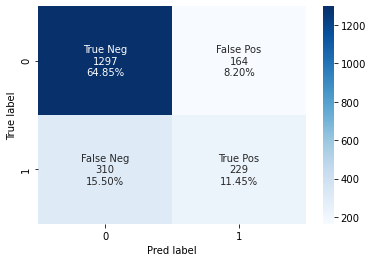

Best Params: OrderedDict([('model', DecisionTreeClassifier(criterion='entropy', max_features='sqrt')), ('model__criterion', 'entropy'), ('model__max_features', 'sqrt'), ('model__min_samples_split', 2), ('model__splitter', 'best')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.89      0.81      0.85      1607
           1       0.42      0.58      0.49       393

    accuracy                           0.76      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.80      0.76      0.78      2000


###### [KNN] ######
Training time: 83.71s
Best training score 0.9227 using recall_score
Test score for f1_score: 0.5472
Test score for accuracy_score: 0.7625
Test score for recall_score: 0.4375
Test score for precision_score: 0.7303


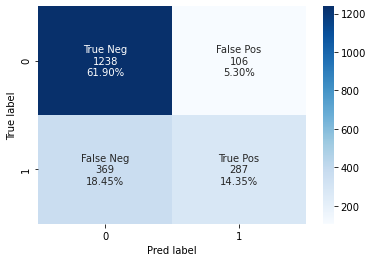

Best Params: OrderedDict([('model', KNeighborsClassifier(leaf_size=49, n_neighbors=7, p=1, weights='distance')), ('model__algorithm', 'auto'), ('model__leaf_size', 49), ('model__n_neighbors', 7), ('model__p', 1), ('model__weights', 'distance')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.92      0.77      0.84      1607
           1       0.44      0.73      0.55       393

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.83      0.76      0.78      2000


###### [RandomForest] ######
Training time: 168.18s
Best training score 0.8977 using recall_score
Test score for f1_score: 0.5947
Test score for accuracy_score: 0.8310
Test score for recall_score: 0.5624
Test score for precision_score: 0.6310


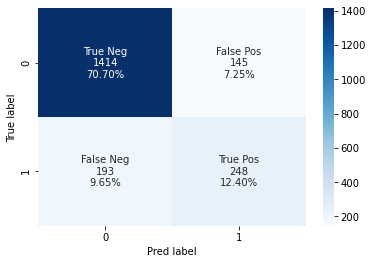

Best Params: OrderedDict([('model', RandomForestClassifier(bootstrap=0, max_features='auto', n_estimators=300)), ('model__bootstrap', 0), ('model__criterion', 'gini'), ('model__max_features', 'auto'), ('model__min_samples_split', 2), ('model__n_estimators', 300)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.91      0.88      0.89      1607
           1       0.56      0.63      0.59       393

    accuracy                           0.83      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.83      0.83      2000


###### [Perceptron] ######
Training time: 49.82s
Best training score 0.8024 using recall_score
Test score for f1_score: 0.4743
Test score for accuracy_score: 0.7185
Test score for recall_score: 0.3746
Test score for precision_score: 0.6463


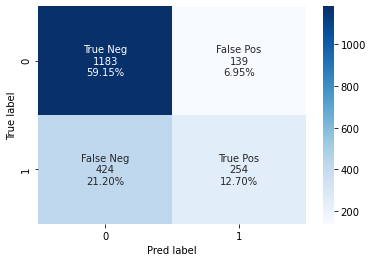

Best Params: OrderedDict([('model', Perceptron(alpha=0.0064362061427709165, eta0=0.6870069785430518,
           fit_intercept=1, max_iter=1113, penalty='l1',
           validation_fraction=0.2423407148431788, warm_start=0)), ('model__alpha', 0.0064362061427709165), ('model__eta0', 0.6870069785430518), ('model__fit_intercept', 1), ('model__max_iter', 1113), ('model__penalty', 'l1'), ('model__validation_fraction', 0.2423407148431788), ('model__warm_start', 0)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1607
           1       0.37      0.65      0.47       393

    accuracy                           0.72      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.72      0.74      2000


###### [MLP] ######
Training time: 351.97s
Best training score 0.8394 using recall_score
Test score for f1_score: 0.5419
Test score for accuracy_score: 0.7675
Test score for recall_scor

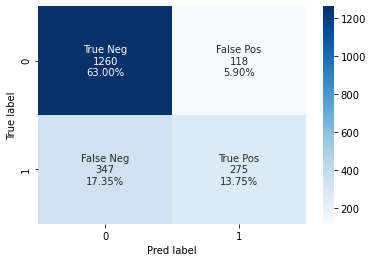

Best Params: OrderedDict([('model', MLPClassifier(activation='tanh', alpha=0.001, learning_rate='adaptive',
              solver='lbfgs')), ('model__activation', 'tanh'), ('model__alpha', 0.001), ('model__learning_rate', 'adaptive'), ('model__solver', 'lbfgs')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1607
           1       0.44      0.70      0.54       393

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.77      0.78      2000



In [20]:
oversampling_smotenc_res = apply_models(X_oversample, X_test_ovs, y_oversample, y_test_ovs)

In [21]:
oversampling_smotenc_res.sort_values(by=['recall_churn'], ascending=False)

model  training_time  f1_score  accuracy_score  \
0                     SVM     788.781257  0.573055          0.7750   
0                     KNN      83.710379  0.547188          0.7625   
0                     MLP     351.965388  0.541872          0.7675   
0        LogistRegression      30.924010  0.495822          0.7285   
0              Perceptron      49.817814  0.474323          0.7185   
0            RandomForest     168.184326  0.594724          0.8310   
0  DecisionTreeClassifier      36.437229  0.491416          0.7630   

   recall_score  precision_score True Neg True Neg Percentage False Pos  \
0      0.456884         0.768448     1248              62.40%        91   
0      0.437500         0.730280     1238              61.90%       106   
0      0.442122         0.699746     1260              63.00%       118   
0      0.390351         0.679389     1190              59.50%       126   
0      0.374631         0.646310     1183              59.15%       139   
0      0.562358         0.631043     1414              70.70%       145   
0      0.424861         0.582697     1297              64.85%       164   

  False Pos Percentage  ... False Neg Percentage True Pos True Pos Percentage  \
0                4.55%  ...               17.95%      302              15.10%   
0                5.30%  ...               18.45%      287              14.35%   
0                5.90%  ...               17.35%      275              13.75%   
0                6.30%  ...               20.85%      267              13.35%   
0                6.95%  ...               21.20%      254              12.70%   
0                7.25%  ...                9.65%      248              12.40%   
0                8.20%  ...               15.50%      229              11.45%   

                                         best_params precision_nchurn  \
0  OrderedDict([('model', SVC(C=5.0, degree=1, pr...         0.932039   
0  OrderedDict([('model', KNeighborsClassifier(le...         0.921131   
0  OrderedDict([('model', MLPClassifier(activatio...         0.914369   
0  OrderedDict([('model', LogisticRegression(solv...         0.904255   
0  OrderedDict([('model', Perceptron(alpha=0.0064...         0.894856   
0  OrderedDict([('model', RandomForestClassifier(...         0.906992   
0  OrderedDict([('model', DecisionTreeClassifier(...         0.887748   

   precision_churn  recall_nchurn  recall_churn  f1score_nchurn  f1score_churn  
0         0.456884       0.776602      0.768448        0.847251       0.573055  
0         0.437500       0.770380      0.730280        0.839038       0.547188  
0         0.442122       0.784070      0.699746        0.844221       0.541872  
0         0.390351       0.740510      0.679389        0.814232       0.495822  
0         0.374631       0.736154      0.646310        0.807784       0.474323  
0         0.562358       0.879900      0.631043        0.893241       0.594724  
0         0.424861       0.807094      0.582697        0.845502       0.491416  

[7 rows x 21 columns]

## Upsampling

In [22]:
columns = scaled_df.columns.values
columns_to_remove = ['RowNumber', 'CustomerId', 'Surname', 'Gender', 'Geography', 'Exited']
columns_to_train = list(set(columns) - set(columns_to_remove))
print('columns_to_train: ', columns_to_train)

X = scaled_df[columns_to_train]
y = scaled_df['Exited']

X_train_ups, X_test_ups, y_train_ups, y_test_ups = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_train:  ['GeographyInt', 'Balance', 'IsActiveMember', 'HasCrCard', 'CreditScore', 'NumOfProducts', 'Age', 'EstimatedSalary', 'GenderInt', 'Tenure']


In [23]:
from imblearn.combine import SMOTETomek  
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([4,5,8,9],random_state = 1)

smote_tomek = SMOTETomek(sampling_strategy='all', smote=smotenc, random_state=4)
X_upsampling, y_upsampling = smote_tomek.fit_resample(X_train_ups, y_train_ups)

0    5963
1    5963
Name: Exited, dtype: int64


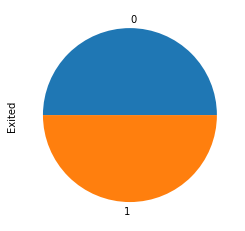

In [24]:
y_upsampling.value_counts().plot(kind = 'pie')
print(y_upsampling.value_counts())

In [25]:
pd.DataFrame(X_upsampling).isnull().any()

GeographyInt       False
Balance            False
IsActiveMember     False
HasCrCard          False
CreditScore        False
NumOfProducts      False
Age                False
EstimatedSalary    False
GenderInt          False
Tenure             False
dtype: bool


###### [LogistRegression] ######
Training time: 29.34s
Best training score 0.7407 using recall_score
Test score for f1_score: 0.4935
Test score for accuracy_score: 0.7270
Test score for recall_score: 0.3883
Test score for precision_score: 0.6768


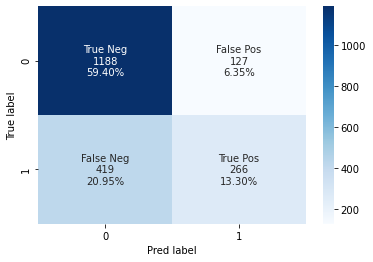

Best Params: OrderedDict([('model', LogisticRegression(solver='sag')), ('model__solver', 'sag')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1607
           1       0.39      0.68      0.49       393

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.73      0.75      2000


###### [SVM] ######
Training time: 680.02s
Best training score 0.8677 using recall_score
Test score for f1_score: 0.5731
Test score for accuracy_score: 0.7765
Test score for recall_score: 0.4587
Test score for precision_score: 0.7634


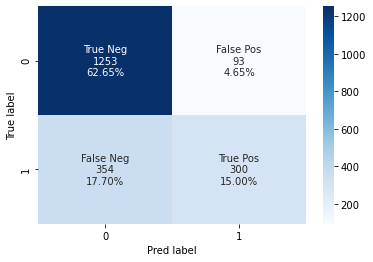

Best Params: OrderedDict([('model', SVC(C=5.0, degree=1, probability=True)), ('model__C', 5.0), ('model__degree', 1), ('model__gamma', 'scale'), ('model__kernel', 'rbf')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.76      0.57       393

    accuracy                           0.78      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.78      0.79      2000


###### [DecisionTreeClassifier] ######
Training time: 39.46s
Best training score 0.8513 using recall_score
Test score for f1_score: 0.5185
Test score for accuracy_score: 0.7725
Test score for recall_score: 0.4438
Test score for precision_score: 0.6234


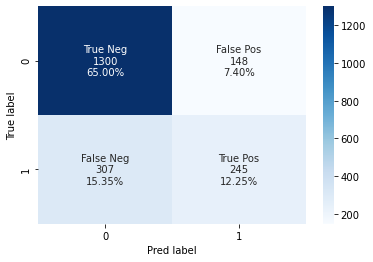

Best Params: OrderedDict([('model', DecisionTreeClassifier(max_features='sqrt')), ('model__criterion', 'gini'), ('model__max_features', 'sqrt'), ('model__min_samples_split', 2), ('model__splitter', 'best')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.90      0.81      0.85      1607
           1       0.44      0.62      0.52       393

    accuracy                           0.77      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.81      0.77      0.79      2000


###### [KNN] ######
Training time: 93.01s
Best training score 0.9477 using recall_score
Test score for f1_score: 0.5511
Test score for accuracy_score: 0.7630
Test score for recall_score: 0.4389
Test score for precision_score: 0.7405


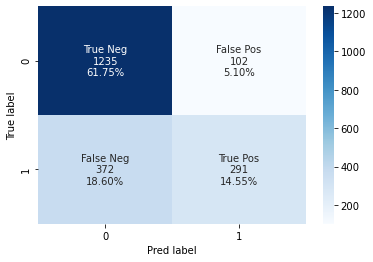

Best Params: OrderedDict([('model', KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, n_neighbors=6, p=1,
                     weights='distance')), ('model__algorithm', 'kd_tree'), ('model__leaf_size', 20), ('model__n_neighbors', 6), ('model__p', 1), ('model__weights', 'distance')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.92      0.77      0.84      1607
           1       0.44      0.74      0.55       393

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.83      0.76      0.78      2000


###### [RandomForest] ######
Training time: 162.20s
Best training score 0.9219 using recall_score
Test score for f1_score: 0.5812
Test score for accuracy_score: 0.8220
Test score for recall_score: 0.5405
Test score for precision_score: 0.6285


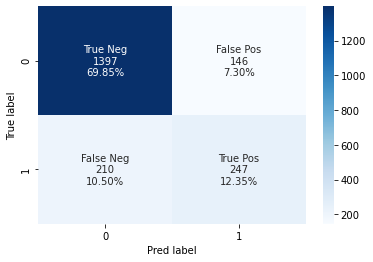

Best Params: OrderedDict([('model', RandomForestClassifier(bootstrap=0, criterion='entropy', max_features='auto',
                       n_estimators=243)), ('model__bootstrap', 0), ('model__criterion', 'entropy'), ('model__max_features', 'auto'), ('model__min_samples_split', 2), ('model__n_estimators', 243)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.54      0.63      0.58       393

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.83      0.82      0.83      2000


###### [Perceptron] ######
Training time: 52.60s
Best training score 0.8957 using recall_score
Test score for f1_score: 0.4599
Test score for accuracy_score: 0.6970
Test score for recall_score: 0.3539
Test score for precision_score: 0.6565


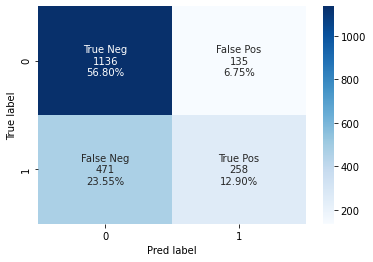

Best Params: OrderedDict([('model', Perceptron(alpha=0.006281816835803498, eta0=1.593629056598045, fit_intercept=1,
           max_iter=1418, penalty='elasticnet',
           validation_fraction=0.14607424153116527, warm_start=1)), ('model__alpha', 0.006281816835803498), ('model__eta0', 1.593629056598045), ('model__fit_intercept', 1), ('model__max_iter', 1418), ('model__penalty', 'elasticnet'), ('model__validation_fraction', 0.14607424153116527), ('model__warm_start', 1)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1607
           1       0.35      0.66      0.46       393

    accuracy                           0.70      2000
   macro avg       0.62      0.68      0.62      2000
weighted avg       0.79      0.70      0.72      2000


###### [MLP] ######
Training time: 362.17s
Best training score 0.8692 using recall_score
Test score for f1_score: 0.5357
Test score for accuracy_score: 0.7660
Test score f

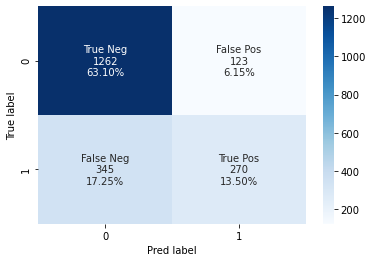

Best Params: OrderedDict([('model', MLPClassifier(activation='tanh', alpha=0.001, learning_rate='adaptive',
              solver='lbfgs')), ('model__activation', 'tanh'), ('model__alpha', 0.001), ('model__learning_rate', 'adaptive'), ('model__solver', 'lbfgs')])

 Results per Class:

               precision    recall  f1-score   support

           0       0.91      0.79      0.84      1607
           1       0.44      0.69      0.54       393

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.77      0.78      2000



In [26]:
upsampling_res = apply_models(X_upsampling, X_test_ups, y_upsampling, y_test_ups)

In [27]:
upsampling_res.sort_values(by=['recall_churn'], ascending=False)

model  training_time  f1_score  accuracy_score  \
0                     SVM     680.023672  0.573066          0.7765   
0                     KNN      93.014366  0.551136          0.7630   
0                     MLP     362.174778  0.535714          0.7660   
0        LogistRegression      29.340858  0.493506          0.7270   
0              Perceptron      52.603757  0.459893          0.6970   
0            RandomForest     162.202096  0.581176          0.8220   
0  DecisionTreeClassifier      39.460500  0.518519          0.7725   

   recall_score  precision_score True Neg True Neg Percentage False Pos  \
0      0.458716         0.763359     1253              62.65%        93   
0      0.438914         0.740458     1235              61.75%       102   
0      0.439024         0.687023     1262              63.10%       123   
0      0.388321         0.676845     1188              59.40%       127   
0      0.353909         0.656489     1136              56.80%       135   
0      0.540481         0.628499     1397              69.85%       146   
0      0.443841         0.623410     1300              65.00%       148   

  False Pos Percentage  ... False Neg Percentage True Pos True Pos Percentage  \
0                4.65%  ...               17.70%      300              15.00%   
0                5.10%  ...               18.60%      291              14.55%   
0                6.15%  ...               17.25%      270              13.50%   
0                6.35%  ...               20.95%      266              13.30%   
0                6.75%  ...               23.55%      258              12.90%   
0                7.30%  ...               10.50%      247              12.35%   
0                7.40%  ...               15.35%      245              12.25%   

                                         best_params precision_nchurn  \
0  OrderedDict([('model', SVC(C=5.0, degree=1, pr...         0.930906   
0  OrderedDict([('model', KNeighborsClassifier(al...         0.923710   
0  OrderedDict([('model', MLPClassifier(activatio...         0.911191   
0  OrderedDict([('model', LogisticRegression(solv...         0.903422   
0  OrderedDict([('model', Perceptron(alpha=0.0062...         0.893784   
0  OrderedDict([('model', RandomForestClassifier(...         0.905379   
0  OrderedDict([('model', DecisionTreeClassifier(...         0.897790   

   precision_churn  recall_nchurn  recall_churn  f1score_nchurn  f1score_churn  
0         0.458716       0.779714      0.763359        0.848629       0.573066  
0         0.438914       0.768513      0.740458        0.838995       0.551136  
0         0.439024       0.785314      0.687023        0.843583       0.535714  
0         0.388321       0.739266      0.676845        0.813142       0.493506  
0         0.353909       0.706907      0.656489        0.789437       0.459893  
0         0.540481       0.869322      0.628499        0.886984       0.581176  
0         0.443841       0.808961      0.623410        0.851064       0.518519  

[7 rows x 21 columns]

# Testing

In [28]:
from sklearn.preprocessing import StandardScaler

test_dataset = df.copy()

test_scaled_dataset = test_dataset.copy()
test_scaler = StandardScaler()
test_columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
test_scaled_dataset[test_columns_to_scale] = test_scaler.fit_transform(test_dataset[test_columns_to_scale])

test_scaled_dataset['GenderInt'] = pd.factorize(test_scaled_dataset['Gender'])[0]
test_scaled_dataset['GeographyInt'] = pd.factorize(test_scaled_dataset['Geography'])[0]

In [29]:
class_0 = test_scaled_dataset[test_scaled_dataset['Exited'] == 0]
class_1 = test_scaled_dataset[test_scaled_dataset['Exited'] == 1]

sample_size = min(len(class_0), len(class_1))

test_dataset = pd.concat([class_0.sample(n=sample_size, replace=False),
                           class_1.sample(n=sample_size, replace=False)])

print(sample_size)


2037


In [30]:
columns = test_scaled_dataset.columns.values
columns_to_remove = ['RowNumber', 'CustomerId', 'Surname', 'Gender', 'Geography', 'Exited']
columns_to_train = list(set(columns) - set(columns_to_remove))
print('columns_to_train: ', columns_to_train)

X = test_dataset[columns_to_train].to_numpy()
y = test_dataset['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_train:  ['GeographyInt', 'Balance', 'IsActiveMember', 'HasCrCard', 'CreditScore', 'NumOfProducts', 'Age', 'EstimatedSalary', 'GenderInt', 'Tenure']


1    1665
0    1594
Name: Exited, dtype: int64


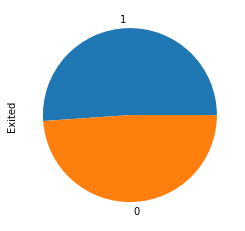

In [31]:
# Checking proportions
y_train.value_counts().plot(kind = 'pie')
print(y_train.value_counts())

In [32]:
# Setting the selected Classification Model
experiments = dict()
score_function = recall_score

experiments ['RandomForest'] = {
    'model': RandomForestClassifier(),
    'space': {
        'model': [RandomForestClassifier()],
        'model__n_estimators': Integer(10, 300),
        'model__criterion': Categorical(['gini', 'entropy']),
        'model__min_samples_split': Integer(2, 7),
        'model__max_features': Categorical(['auto', 'sqrt', 'log2']),
        'model__bootstrap': Integer(0, 1),
    },
    'score_function': score_function
}

In [33]:
experiments

{'RandomForest': {'model': RandomForestClassifier(),
  'space': {'model': [RandomForestClassifier()],
   'model__n_estimators': Integer(low=10, high=300, prior='uniform', transform='identity'),
   'model__criterion': Categorical(categories=('gini', 'entropy'), prior=None),
   'model__min_samples_split': Integer(low=2, high=7, prior='uniform', transform='identity'),
   'model__max_features': Categorical(categories=('auto', 'sqrt', 'log2'), prior=None),
   'model__bootstrap': Integer(low=0, high=1, prior='uniform', transform='identity')},
  'score_function': <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>}}

In [39]:
def apply_models(X_train,X_test,y_train,y_test, show_explanation=False):

    labels = scaled_df['Exited'].values
    result_df = None
    
    for axis_index, experiment_name in enumerate(experiments):
        experiment = experiments[experiment_name]
        print('\n###### [{}] ######'.format(experiment_name))
        results_dict = dict()
        results_dict['model'] = [experiment_name]
      
        start_time = time.time()
        skopt_res = train_model(model=experiment['model'], space=experiment['space'], X=X_train, y=y_train, 
                                score_function=experiment['score_function'])
        training_time = time.time() - start_time
        results_dict['training_time'] = [training_time]
      
        print("Training time: {:.2f}s".format(training_time))
      
        print("Best training score {:.4f} using {}".format(skopt_res.best_score_, experiment['score_function'].__name__))
      
        for score_method in [f1_score, accuracy_score, recall_score, precision_score]:
            tmp_score = score_method(skopt_res.best_estimator_.predict(X_test), y_test)
            print("Test score for {}: {:.4f}".format(score_method.__name__, tmp_score))
            results_dict[score_method.__name__] = [tmp_score]

        if show_explanation:
            try:
                explainer = shap.KernelExplainer(skopt_res.best_estimator_.predict_proba, shap.kmeans(X_test, 10))
                shap_values = explainer.shap_values(X_test)
                shap.summary_plot(shap_values=shap_values, features=X_test, feature_names=columns_to_train, plot_type="bar")
            except Exception:
                pass
      
        cf_matrix = confusion_matrix(skopt_res.best_estimator_.predict(X_test), y_test)
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ['{0:0.0f}'.format(value) for value in
                      cf_matrix.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in
                          cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)

        for group_name, group_count, group_percentage in zip(group_names, group_counts, group_percentages):
            results_dict[group_name] = [group_count]
            results_dict[group_name + ' Percentage'] = [group_percentage]


        ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
        ax.set(xlabel='Pred label', ylabel='True label')
        plt.show()

        print("Best Params: {}".format(str(skopt_res.best_params_)))
        results_dict['best_params'] = [str(skopt_res.best_params_)]

        ###
        
        print('\n','Results per Class:')
        class_report = classification_report(y_test,skopt_res.best_estimator_.predict(X_test),output_dict = True)
        print('\n',classification_report(y_test,skopt_res.best_estimator_.predict(X_test)))

        results_dict['precision_nchurn'] = class_report['0']['precision']
        results_dict['precision_churn'] = class_report['1']['precision']
        results_dict['recall_nchurn'] = class_report['0']['recall']
        results_dict['recall_churn'] = class_report['1']['recall']
        results_dict['f1score_nchurn'] = class_report['0']['f1-score']
        results_dict['f1score_churn'] = class_report['1']['f1-score']
        
        ####

        temp_df = pd.DataFrame(results_dict)
        if result_df is None:
            result_df = temp_df.copy()
        else:
            result_df = pd.concat([result_df, temp_df])
        return skopt_res

    return result_df     


###### [RandomForest] ######
Training time: 67.89s
Best training score 0.7640 using recall_score
Test score for f1_score: 0.7581
Test score for accuracy_score: 0.7706
Test score for recall_score: 0.7307
Test score for precision_score: 0.7876


  0%|          | 0/815 [00:00<?, ?it/s]

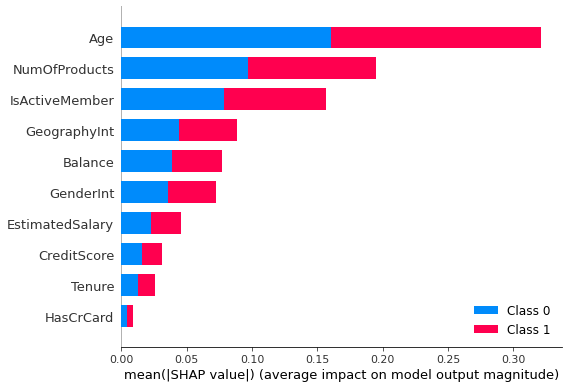

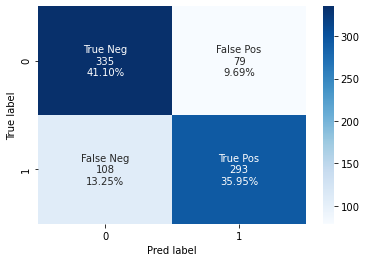

Best Params: OrderedDict([('model', RandomForestClassifier(bootstrap=1, min_samples_split=7, n_estimators=75)), ('model__bootstrap', 1), ('model__criterion', 'gini'), ('model__max_features', 'sqrt'), ('model__min_samples_split', 7), ('model__n_estimators', 75)])

 Results per Class:

               precision    recall  f1-score   support

           0       0.81      0.76      0.78       443
           1       0.73      0.79      0.76       372

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815



In [40]:
test_subsampling_res = apply_models(X_train, X_test, y_train, y_test, show_explanation=True)

In [35]:
indices = test_scaled_dataset[columns_to_train].iloc[:10].index
list(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
test_dataset

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
810         811    15699430     Davide    -0.336568    France  Female   
3779       3780    15694160     Sagese    -0.274488    France    Male   
9780       9781    15617432   Folliero     1.712093   Germany  Female   
5486       5487    15783882       Daly     1.246488     Spain  Female   
7191       7192    15567839     Gordon    -1.547141    France    Male   
...         ...         ...        ...          ...       ...     ...   
5114       5115    15721460    Lorenzo     0.284238    France    Male   
9998       9999    15682355  Sabbatini     1.256835   Germany    Male   
3300       3301    15801904      Heard     0.273892   Germany    Male   
518         519    15775912   Mazzanti     0.491174    France    Male   
8336       8337    15788480   Pagnotto     1.401690   Germany  Female   

           Age    Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
810  -0.373958  1.724464 -1.225848       0.807737          1               0   
3779 -0.183251 -1.733315 -1.225848       0.807737          0               0   
9780  0.102810  1.378686  0.521159      -0.911583          1               1   
5486  0.198164 -0.004426 -1.225848       0.807737          0               1   
7191  0.293517  1.378686  0.611360      -0.911583          0               1   
...        ...       ...       ...            ...        ...             ...   
5114  2.009882  1.032908  1.749562      -0.911583          0               0   
9998  0.293517 -0.695982 -0.022608       0.807737          1               0   
3300 -1.041433 -1.733315  1.081864       0.807737          1               0   
518   0.865639 -0.350204  0.396709       0.807737          0               1   
8336 -0.564665 -1.733315  0.734678      -0.911583          0               0   

      EstimatedSalary  Exited  GenderInt  GeographyInt  
810          1.397198       0          0             0  
3779         0.208917       0          1             0  
9780        -0.356643       0          0             2  
5486        -0.124776       0          0             1  
7191        -0.150597       0          1             0  
...               ...     ...        ...           ...  
5114         1.600941       1          1             0  
9998        -0.125231       1          1             2  
3300        -1.588217       1          1             2  
518          1.351571       1          1             0  
8336        -1.136856       1          0             2  

[4074 rows x 16 columns]

In [42]:
test_dataset.iloc[indices]

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
810         811    15699430     Davide    -0.336568    France  Female   
3779       3780    15694160     Sagese    -0.274488    France    Male   
9780       9781    15617432   Folliero     1.712093   Germany  Female   
5486       5487    15783882       Daly     1.246488     Spain  Female   
7191       7192    15567839     Gordon    -1.547141    France    Male   
1465       1466    15753566   Espinosa     1.608626    France  Female   
4032       4033    15593555   Chinedum    -2.281762    France    Male   
6619       6620    15586517    Toscano    -0.036512    France    Male   
7620       7621    15629133      Black    -0.740092    France  Female   
6015       6016    15582591  Chiabuotu    -0.367609     Spain    Male   

           Age    Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
810  -0.373958  1.724464 -1.225848       0.807737          1               0   
3779 -0.183251 -1.733315 -1.225848       0.807737          0               0   
9780  0.102810  1.378686  0.521159      -0.911583          1               1   
5486  0.198164 -0.004426 -1.225848       0.807737          0               1   
7191  0.293517  1.378686  0.611360      -0.911583          0               1   
1465 -0.660018 -0.695982 -0.203903      -0.911583          1               0   
4032 -0.087897  1.378686 -1.225848       0.807737          1               1   
6619 -0.660018 -0.004426  0.329442      -0.911583          1               1   
7620 -1.136786  1.378686 -1.225848       0.807737          1               0   
6015  1.914528 -0.350204  1.270632      -0.911583          1               1   

      EstimatedSalary  Exited  GenderInt  GeographyInt  
810          1.397198       0          0             0  
3779         0.208917       0          1             0  
9780        -0.356643       0          0             2  
5486        -0.124776       0          0             1  
7191        -0.150597       0          1             0  
1465         0.982528       0          0             0  
4032        -1.530918       0          1             0  
6619        -1.338214       0          1             0  
7620         0.465129       0          0             0  
6015         0.177106       0          1             1

In [43]:
for i in range(10):
    row = test_dataset[columns_to_train].iloc[i]
    index = row.index
    value = row.to_numpy()
  
    print(test_dataset['Exited'].iloc[i], test_subsampling_res.best_estimator_.predict_proba([value]), 
                                          test_subsampling_res.best_estimator_.predict([value]))

0 [[0.84763011 0.15236989]] [0]
0 [[0.91493122 0.08506878]] [0]
0 [[0.6476431 0.3523569]] [0]
0 [[0.90362674 0.09637326]] [0]
0 [[0.75053487 0.24946513]] [0]
0 [[0.79761712 0.20238288]] [0]
0 [[0.86142857 0.13857143]] [0]
0 [[0.91106349 0.08893651]] [0]
0 [[0.97 0.03]] [0]
0 [[0.56464883 0.43535117]] [0]


In [46]:
for i in range(5):
    print(X_test[i])
    print(test_subsampling_res.best_estimator_.predict([X_test[i]]))

[ 0.          1.52957647  1.          0.          1.70174662 -0.91158349
 -1.42284721  1.35527646  1.          0.68712986]
[0]
[ 1.         -1.22584767  0.          1.          0.3877061  -0.91158349
 -0.37395771 -1.29725093  0.          0.34135195]
[1]
[ 0.         -0.01837106  1.          1.         -1.71268937 -0.91158349
  0.00745665 -0.51167274  0.         -1.04175968]
[0]
[ 1.         -1.22584767  1.          1.         -0.31587465  0.80773656
 -0.08789694 -1.07942048  1.         -1.73331549]
[0]
[ 0.         -0.12998978  0.          1.         -1.4436732  -0.91158349
  0.5795782   1.61839448  1.         -0.00442596]
[1]


In [45]:
test_subsampling_res.best_estimator_.predict_proba(X_test)

array([[0.76710582, 0.23289418],
       [0.20976239, 0.79023761],
       [0.51541222, 0.48458778],
       ...,
       [0.06756566, 0.93243434],
       [0.49255026, 0.50744974],
       [0.87662386, 0.12337614]])